# 한강공원 주차 예측

### 초기 세팅

In [372]:
# pip install requests
import warnings
warnings.filterwarnings('ignore')

In [373]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 한강공원 API

In [374]:
# import requests
# import json
# import time

# # API 데이터 요청 함수
# def fetch_data(url):
#     # 주어진 URL로 GET 요청을 보내고 응답을 받음
#     response = requests.get(url)
    
#     # 응답 상태 코드가 200(성공)이면 JSON 데이터를 반환
#     if response.status_code == 200:
#         return response.json()
#     else:
#         # 상태 코드가 200이 아니면 오류 메시지 출력
#         print(f"Error: {response.status_code}")
#         return None

# # 실시간 인구 및 혼잡도 정보 추출 함수
# def extract_congestion_info(city_data):
#     # 'LIVE_PPLTN_STTS' 키로부터 실시간 인구 현황 데이터 추출
#     live_ppltn = city_data.get('LIVE_PPLTN_STTS', [])
#     # 첫 번째 인구 정보 항목을 가져오거나 없으면 빈 딕셔너리 반환
#     congestion_info = live_ppltn[0] if live_ppltn else {}
    
#     # 추출한 데이터를 딕셔너리 형태로 반환
#     return {
#         "장소명": city_data.get("AREA_NM", "정보 없음"),  # 장소명
#         "장소 코드": city_data.get("AREA_CD", "정보 없음"),  # 장소 코드
#         "장소 혼잡도 지표": congestion_info.get("AREA_CONGEST_LVL", "정보 없음"),  # 혼잡도 지표
#         "장소 혼잡도 지표 관련 메세지": congestion_info.get("AREA_CONGEST_MSG", "정보 없음"),  # 혼잡도 메세지
#         "실시간 인구 현황": congestion_info.get("AREA_PPLTN_MIN", "정보 없음") + " ~ " + congestion_info.get("AREA_PPLTN_MAX", "정보 없음")  # 실시간 인구 현황
#     }

# # 주차장 중복 제거 및 최신 정보 선택 함수
# def extract_unique_parking_info(city_data):
#     # 'PRK_STTS' 키로부터 주차장 상태 정보 추출
#     parking_data = city_data.get("PRK_STTS", [])
#     unique_parking = {}
    
#     # 주차장 데이터에서 중복된 주차장 정보를 제거하고 최신 정보만 유지
#     for prk in parking_data:
#         key = (prk.get("PRK_NM"), prk.get("PRK_CD"))  # 주차장 이름과 코드로 고유 키 생성
#         if key not in unique_parking or prk.get("CUR_PRK_TIME"):  # 최신 정보가 있으면 업데이트
#             unique_parking[key] = prk
    
#     # 고유한 주차장 정보만 리스트로 반환
#     return list(unique_parking.values())

# # 날씨 현황 정보 추출 함수
# def extract_weather_info(city_data):
#     # 'WEATHER_STTS' 키로부터 날씨 상태 데이터 추출 (리스트일 경우 첫 번째 항목 선택)
#     weather_data = city_data.get('WEATHER_STTS', [])
#     weather_info = weather_data[0] if weather_data else {}  # 첫 번째 항목이 있으면 가져오고, 없으면 빈 딕셔너리
    
#     # 추출한 날씨 정보를 딕셔너리 형태로 반환
#     return {
#         "기온": weather_info.get("TEMP", "정보 없음"),  # 기온
#         "체감 온도": weather_info.get("SENSIBLE_TEMP", "정보 없음"),  # 체감 온도
#         "습도": weather_info.get("HUMIDITY", "정보 없음"),  # 습도
#         "풍향": weather_info.get("WIND_DIRCT", "정보 없음"),  # 바람 방향
#         "통합대기환경지수": weather_info.get("AIR_IDX_MVL", "정보 없음"),  # 통합 대기 환경 지수
#         "통합대시환경지수메세지": weather_info.get("AIR_MSG", "정보 없음"),  # 통합 대기 환경 지수 메시지
#     }

# # 전체 데이터 처리 함수
# def process_city_data(data):
#     # 'CITYDATA' 키로부터 도시 데이터 추출
#     city_data = data.get('CITYDATA', {})
    
#     # 인구 및 혼잡도 정보 추출
#     congestion_info = extract_congestion_info(city_data)
#     # 중복된 주차장 정보 처리 후 고유한 주차장 정보 리스트 추출
#     unique_parking_list = extract_unique_parking_info(city_data)
#     # 날씨 현황 정보 추출
#     weather_info = extract_weather_info(city_data)
    
#     # 필요한 모든 데이터를 딕셔너리 형태로 반환
#     return {
#         **congestion_info,  # 인구 및 혼잡도 정보
#         "전체도로소통평균속도": city_data.get("ROAD_TRAFFIC_SPD", "정보 없음"),  # 도로 소통 평균 속도
#         "도로소통현황 업데이트 시간": city_data.get("ROAD_TRAFFIC_TIME", "정보 없음"),  # 도로 소통 현황 업데이트 시간
#         "전체도로소통평균현황 메세지": city_data.get("ROAD_MSG", "정보 없음"),  # 도로 소통 현황 메시지
#         "주차장 현황": unique_parking_list,  # 주차장 현황
#         **weather_info  # 날씨 현황 정보
#     }

# # 결과 출력 함수
# def print_data(data):
#     # 처리된 데이터를 읽기 쉬운 형식으로 출력
#     print("\n추출한 데이터 (row 형태):")
#     print(json.dumps(data, ensure_ascii=False, indent=4))

# # 실행 함수
# def main(pname):
#     # 시작 시간 기록
#     start_time = time.time()

#     # API URL 설정 (JSON 형식)
#     url = f'http://openapi.seoul.go.kr:8088/434675486868617235394264587a4e/json/citydata/1/1000/{pname}'

#     # 데이터 가져오기
#     data = fetch_data(url)
    
#     # 데이터가 유효하면 처리 후 출력
#     if data:
#         processed_data = process_city_data(data)
#         print_data(processed_data)

#     # 종료 시간 기록 및 실행 시간 출력
#     end_time = time.time()
#     print(f"\n코드 실행 시간: {end_time - start_time:.4f}초")

# # 프로그램 실행
# if __name__ == "__main__":
#     main()

## 데이터 준비

---
### 한강 공원 일별 Data 
    Target
- 주차 가능 공간 수
----
    Feature
- 요일
- 시간
- 날씨
- 행사 일정
- 인근 대중교통 이용량
- 주변 인구 밀집도
- 주차 면수
- 이용시간

In [375]:
# 데이터 불러오기
import pandas as pd

# 데이터 일별 주차대수 및 이용시간 현황
df_day = pd.read_csv("../Data/한강공원 주차장 일별 이용 현황.csv", encoding='euc-kr', index_col=False)
# 데이터 월별 공원 
df_month = pd.read_csv("../Data/서울시 한강공원 월별 이용객 현황.csv", encoding='euc-kr', index_col=False)

In [376]:
# 데이터 확인하기
print(f"한강공원 주차장 일별 데이터 :")
print(df_day.info())

In [377]:
# 결측치 시각화
# train NaN값 시각화
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df_day, figsize=(12, 5))

plt.show()

> 주차장 일별 데이터는 결측치가 없는 것을 확인 할 수 있다.

In [378]:
# 날짜 컬럼을 날짜 형식으로 전환
df_day['날짜'] = pd.to_datetime(df_day['날짜'], format= '%Y/%m/%d')

# 일별 날짜 컬럼을 연,월,일 컬럼으로 분리
df_day['연도'] = df_day['날짜'].dt.year
df_day['월'] = df_day['날짜'].dt.month
df_day['일'] = df_day['날짜'].dt.day

df_day

,지구별,주차장명,주차대수,이용시간,날짜,연도,월,일
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,2024,11,10
1,PLT-011,잠실1주차장,1059,66361,2024-11-10,2024,11,10
2,PLT-001,강서1주차장,329,26875,2024-11-10,2024,11,10
3,PLT-008,여의도5주차장,229,22509,2024-11-10,2024,11,10
4,PLT-008,여의도2주차장,1934,150135,2024-11-10,2024,11,10
...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020-01-16,2020,1,16
45273,PLT-001,강서1주차장,28,347,2020-01-16,2020,1,16
45274,PLT-008,여의도1주차장,114,6073,2020-01-15,2020,1,15
45275,PLT-001,강서1주차장,12,68,2020-01-15,2020,1,15


In [379]:
# pip install holidays

### 데이터 전처리

### 요일 정보
    0 : 월요일
    1 : 화요일
    2 : 수요일
    3 : 목요일
    4 : 금요일
    5 : 토요일
    6 : 일요일
### 휴일여부 정보
    0 : 평일
    1 : 휴일

In [380]:
# 평일 휴일로 분리 및 요일 변환 
import holidays

# 대한민국 공휴일 가져오기
kr_holidays = holidays.KR(years=range(2020,2025))

# 요일 변환
weekday_map = {0 : 0, 1 : 1, 2 : 2, 3: 3, 4: 4, 5: 5, 6: 6}

# 요일 숫자를 요일 이름으로 변환
df_day['요일'] = df_day['날짜'].dt.weekday.map(weekday_map)

# 날짜가 공휴일인지를 체크하는 함수 추가
df_day['휴일여부'] = df_day['날짜'].apply(lambda x: 2 if x in kr_holidays else (1 if x.weekday() >= 5 else 0))

# 데이터 확인
df_day

,지구별,주차장명,주차대수,이용시간,날짜,연도,월,일,요일,휴일여부
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,2024,11,10,6,1
1,PLT-011,잠실1주차장,1059,66361,2024-11-10,2024,11,10,6,1
2,PLT-001,강서1주차장,329,26875,2024-11-10,2024,11,10,6,1
3,PLT-008,여의도5주차장,229,22509,2024-11-10,2024,11,10,6,1
4,PLT-008,여의도2주차장,1934,150135,2024-11-10,2024,11,10,6,1
...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020-01-16,2020,1,16,3,0
45273,PLT-001,강서1주차장,28,347,2020-01-16,2020,1,16,3,0
45274,PLT-008,여의도1주차장,114,6073,2020-01-15,2020,1,15,2,0
45275,PLT-001,강서1주차장,12,68,2020-01-15,2020,1,15,2,0


> 데이터의 '이용시간' 컬럼이 분 단위이기 때문에 분 단위를 차랑 평균당 시간으로 변환시켜준다.

In [381]:
# 시간 변환
df_day['주차장 이용 시간(H)'] = (df_day['이용시간'] / 60)

In [382]:
# 데이터 확인
df_day

,지구별,주차장명,주차대수,이용시간,날짜,연도,월,일,요일,휴일여부,주차장 이용 시간(H)
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,2024,11,10,6,1,381.516667
1,PLT-011,잠실1주차장,1059,66361,2024-11-10,2024,11,10,6,1,1106.016667
2,PLT-001,강서1주차장,329,26875,2024-11-10,2024,11,10,6,1,447.916667
3,PLT-008,여의도5주차장,229,22509,2024-11-10,2024,11,10,6,1,375.150000
4,PLT-008,여의도2주차장,1934,150135,2024-11-10,2024,11,10,6,1,2502.250000
...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020-01-16,2020,1,16,3,0,3691.400000
45273,PLT-001,강서1주차장,28,347,2020-01-16,2020,1,16,3,0,5.783333
45274,PLT-008,여의도1주차장,114,6073,2020-01-15,2020,1,15,2,0,101.216667
45275,PLT-001,강서1주차장,12,68,2020-01-15,2020,1,15,2,0,1.133333


---
### 날씨
- 한강공원에 날씨 기온에 따라 사람들의 인구수 차이가 있는 것을 확인
- 데이터 전처리 및 병합

> 날씨 컬럼 추가하기

In [383]:
# 날씨 CSV FILE 불러오기
weather_seoul = pd.read_csv("../Data/서울 날씨(180131~240229).csv", encoding='euc-kr')
weather_seoul = pd.read_csv("../Data/서울날씨20-24.csv", encoding='euc-kr')

# Data 확인하기
weather_seoul.sort_values(by='일시', axis=0,ascending=False, inplace=True)
weather_seoul

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%)
1762,108,서울,2024-11-10,14.4,10.3,536.0,21.0,1520,NaN,NaN,7.4,64.0
1761,108,서울,2024-11-09,12.9,6.8,607.0,20.3,1436,NaN,NaN,3.9,55.8
1760,108,서울,2024-11-08,10.2,3.1,629.0,18.1,1501,NaN,NaN,0.1,50.8
1759,108,서울,2024-11-07,7.8,1.6,707.0,15.7,1515,NaN,NaN,-3.0,48.1
1758,108,서울,2024-11-06,7.5,4.1,628.0,12.5,1430,NaN,NaN,-3.6,46.1
...,...,...,...,...,...,...,...,...,...,...,...,...
4,108,서울,2020-01-18,0.3,-4.1,802.0,5.9,1503,NaN,NaN,-10.0,48.1
3,108,서울,2020-01-17,-0.6,-4.8,720.0,4.9,1449,NaN,NaN,-11.7,43.9
2,108,서울,2020-01-16,-1.7,-5.5,816.0,3.2,1430,NaN,NaN,-13.0,43.0
1,108,서울,2020-01-15,-2.7,-6.4,722.0,2.2,1510,NaN,NaN,-13.4,44.8


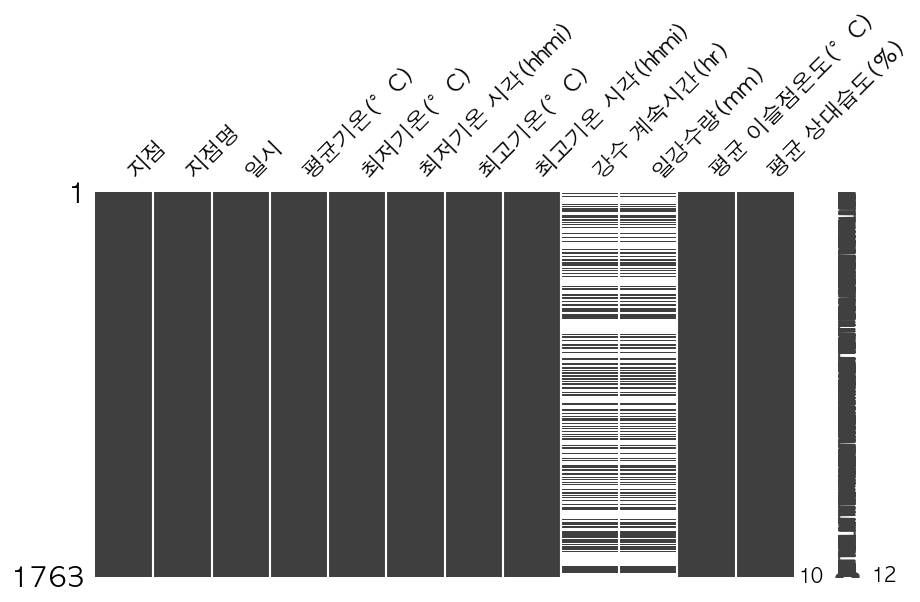

In [384]:
# 결측치 확인하기

msno.matrix(weather_seoul, figsize=(10,5))
plt.show()

> 강수 계속시간과 일 강수량은 결측치가 많은 것으로 확인된다.        
결측치가 많은 이유는 비가 오지 않은 날을 기입을 하지 않은 것으로 보임.

In [385]:
# 일시 컬럼 날짜 컬럼명 KEY 값 연동
weather_seoul['날짜'] = weather_seoul['일시']

In [386]:
# 데이터 변환
weather_seoul['날짜'] = pd.to_datetime(weather_seoul['날짜'], format='%Y-%m-%d')

In [387]:
# 날짜를 기준으로 병합
df_merged = pd.merge(df_day, weather_seoul[['날짜', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '평균 상대습도(%)']],
                     how='left', left_on='날짜', right_on='날짜')

# 병합 결과 확인
df_merged

,지구별,주차장명,주차대수,이용시간,날짜,연도,월,일,요일,휴일여부,주차장 이용 시간(H),평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%)
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,2024,11,10,6,1,381.516667,14.4,10.3,21.0,64.0
1,PLT-011,잠실1주차장,1059,66361,2024-11-10,2024,11,10,6,1,1106.016667,14.4,10.3,21.0,64.0
2,PLT-001,강서1주차장,329,26875,2024-11-10,2024,11,10,6,1,447.916667,14.4,10.3,21.0,64.0
3,PLT-008,여의도5주차장,229,22509,2024-11-10,2024,11,10,6,1,375.150000,14.4,10.3,21.0,64.0
4,PLT-008,여의도2주차장,1934,150135,2024-11-10,2024,11,10,6,1,2502.250000,14.4,10.3,21.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020-01-16,2020,1,16,3,0,3691.400000,-1.7,-5.5,3.2,43.0
45273,PLT-001,강서1주차장,28,347,2020-01-16,2020,1,16,3,0,5.783333,-1.7,-5.5,3.2,43.0
45274,PLT-008,여의도1주차장,114,6073,2020-01-15,2020,1,15,2,0,101.216667,-2.7,-6.4,2.2,44.8
45275,PLT-001,강서1주차장,12,68,2020-01-15,2020,1,15,2,0,1.133333,-2.7,-6.4,2.2,44.8


---
### 한강공원 월별 이용객 데이터 불러오기
- 한강공원에 일별 주차 비율(혼잡도)을 예측하기 위해서는 데이터가 부족           
- 월별 데이터를 이용하여 이용자의 '아침', '낮', '저녁'의 비율을 파악        
- 파악한 이유는 비율로 주차장의 데이터를 군집회하기 위함.       

In [388]:
df_month = pd.read_csv("../Data/서울시 한강공원 월별 이용객 현황.csv", encoding='euc-kr')
df_month

,현황 일련번호,공원 코드,공원명,공원 시명,공원 구명,공원 지번 주소,공원 도로명 주소,등록자 일련번호,등록 일시,수정자 일련번호,...,강변물놀이장,강변프롬나드,난지 하늘다리,갈대숲탐장로,꿀벌숲,치유의숲,그라스정원,노들섬,습지생태공원,현황 일시
0,87623,Hzone001,광나루한강공원,서울,강동구,암사동 637-6,선사로 83-106,83,2024-03-08 10:40:48.0,NaN,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
1,87629,Hzone006,이촌한강공원,서울,용산구,이촌동 302-17,이촌로72길 62,83,2024-03-08 14:14:33.0,NaN,...,0,0,0,0,0,0,0,19198,0,2024-02-29 00:00:00.0
2,87626,Hzone003,뚝섬한강공원,서울,광진구,자양동 427-1,강변북로 2273,83,2024-03-08 11:29:41.0,83.0,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
3,87625,Hzone002,잠실한강공원,서울,송파구,잠실동 1-1,한가람로 65,83,2024-03-08 10:44:40.0,NaN,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
4,87631,Hzone008,양화한강공원,서울,영등포구,당산동 98-1,노들로 221,83,2024-03-08 14:40:51.0,NaN,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,86798,Hzone002,잠실한강공원,서울,송파구,잠실동 1-1,한가람로 65,5,2018-01-31 00:00:00.0,NaN,...,0,0,0,0,0,0,0,0,0,2018-01-31 00:00:00.0
811,86802,Hzone007,여의도한강공원,서울,영등포구,여의도동 85-1,여의동로 280,10,2018-01-31 00:00:00.0,NaN,...,0,0,0,0,0,0,0,0,0,2018-01-31 00:00:00.0
812,86801,Hzone008,양화한강공원,서울,영등포구,당산동 98-1,노들로 221,11,2018-01-31 00:00:00.0,NaN,...,0,0,0,0,0,0,0,0,0,2018-01-31 00:00:00.0
813,86800,Hzone003,뚝섬한강공원,서울,광진구,자양동 427-1,강변북로 2273,6,2018-01-31 00:00:00.0,NaN,...,0,0,0,0,0,0,0,0,0,2018-01-31 00:00:00.0


> 월별 데이터를 일별 데이터로 합치기 위해 datetime으로 변환하여 연도,월 컬럼으로 분리작업을 시켜준다.

In [389]:
# 현황 일시가 object type을 datetime으로 변환
df_month['현황 일시'] = pd.to_datetime(df_month['현황 일시'], format='%Y-%m-%d %H:%M:%S.%f')

# 일별 날짜 컬럼을 연도, 월 컬럼으로 분리

df_month['연도'] = df_month['현황 일시'].dt.year
df_month['월'] = df_month['현황 일시'].dt.month

df_month

,현황 일련번호,공원 코드,공원명,공원 시명,공원 구명,공원 지번 주소,공원 도로명 주소,등록자 일련번호,등록 일시,수정자 일련번호,...,난지 하늘다리,갈대숲탐장로,꿀벌숲,치유의숲,그라스정원,노들섬,습지생태공원,현황 일시,연도,월
0,87623,Hzone001,광나루한강공원,서울,강동구,암사동 637-6,선사로 83-106,83,2024-03-08 10:40:48.0,NaN,...,0,0,0,0,0,0,0,2024-02-29,2024,2
1,87629,Hzone006,이촌한강공원,서울,용산구,이촌동 302-17,이촌로72길 62,83,2024-03-08 14:14:33.0,NaN,...,0,0,0,0,0,19198,0,2024-02-29,2024,2
2,87626,Hzone003,뚝섬한강공원,서울,광진구,자양동 427-1,강변북로 2273,83,2024-03-08 11:29:41.0,83.0,...,0,0,0,0,0,0,0,2024-02-29,2024,2
3,87625,Hzone002,잠실한강공원,서울,송파구,잠실동 1-1,한가람로 65,83,2024-03-08 10:44:40.0,NaN,...,0,0,0,0,0,0,0,2024-02-29,2024,2
4,87631,Hzone008,양화한강공원,서울,영등포구,당산동 98-1,노들로 221,83,2024-03-08 14:40:51.0,NaN,...,0,0,0,0,0,0,0,2024-02-29,2024,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,86798,Hzone002,잠실한강공원,서울,송파구,잠실동 1-1,한가람로 65,5,2018-01-31 00:00:00.0,NaN,...,0,0,0,0,0,0,0,2018-01-31,2018,1
811,86802,Hzone007,여의도한강공원,서울,영등포구,여의도동 85-1,여의동로 280,10,2018-01-31 00:00:00.0,NaN,...,0,0,0,0,0,0,0,2018-01-31,2018,1
812,86801,Hzone008,양화한강공원,서울,영등포구,당산동 98-1,노들로 221,11,2018-01-31 00:00:00.0,NaN,...,0,0,0,0,0,0,0,2018-01-31,2018,1
813,86800,Hzone003,뚝섬한강공원,서울,광진구,자양동 427-1,강변북로 2273,6,2018-01-31 00:00:00.0,NaN,...,0,0,0,0,0,0,0,2018-01-31,2018,1


In [390]:
# 데이터 info확인
df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 64 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   현황 일련번호      815 non-null    int64         
 1   공원 코드        815 non-null    object        
 2   공원명          815 non-null    object        
 3   공원 시명        815 non-null    object        
 4   공원 구명        815 non-null    object        
 5   공원 지번 주소     815 non-null    object        
 6   공원 도로명 주소    815 non-null    object        
 7   등록자 일련번호     815 non-null    int64         
 8   등록 일시        815 non-null    object        
 9   수정자 일련번호     62 non-null     float64       
 10  수정 일시        62 non-null     object        
 11  일반이용자(아침)    812 non-null    float64       
 12  일반이용자(낮)     815 non-null    int64         
 13  일반이용자(저녁)    815 non-null    int64         
 14  자전거          815 non-null    int64         
 15  인라인          810 non-null    float64       
 16  pm(개인형이동

> 사용하려는 데이터 일반이용자(아침)이 null값이 3개 존재함.

In [391]:
# 3개이므로 null값을 평균대치법 사용.

# NaN 값을 평균값으로 채운 후 int로 변환
df_month['일반이용자(아침)'] = df_month['일반이용자(아침)'].fillna(df_month['일반이용자(아침)'].mean()).astype('int')

In [392]:
# 2020년 1월 14일부터 2024년 2월 29일까지의 데이터 추출
start_date = '2020-01-14'
end_date = '2024-02-29'
filtered_df = df_month[df_month['현황 일시'].between(start_date, end_date)]
filtered_df = filtered_df.loc[:,['공원 코드','연도', '월','일반이용자(아침)','일반이용자(낮)','일반이용자(저녁)']]
print(filtered_df)

        공원 코드    연도  월  일반이용자(아침)  일반이용자(낮)  일반이용자(저녁)
0    Hzone001  2024  2       2840     33780      25450
1    Hzone006  2024  2       5145     47990      37857
2    Hzone003  2024  2      13100    167450     187420
3    Hzone002  2024  2       9820     41340      49010
4    Hzone008  2024  2      11150     33940      32050
..        ...   ... ..        ...       ...        ...
546  Hzone010  2020  1       2854     50209      41380
547  Hzone003  2020  1     115350    426960     244710
548  Hzone009  2020  1       3855     35250      32910
549  Hzone001  2020  1      11110     47790      37360
550  Hzone011  2020  1       4515     42401      36832

[551 rows x 6 columns]


In [393]:
# 일별 데이터에 merge하기 위해 공원코드 지구별 코드로 변환

park_code = {'Hzone011' : 'PLT-001', 'Hzone009' : 'PLT-002', 'Hzone010' : 'PLT-003', 'Hzone006' : 'PLT-004', 'Hzone003' : 'PLT-005', 'Hzone001' : 'PLT-006', 'Hzone008' : 'PLT-007', 'Hzone007' : 'PLT-008', 'Hzone005' : 'PLT-009', 'Hzone004' : 'PLT-0010', 'Hzone002' : 'PLT-0011'}

filtered_df['공원 코드'] = filtered_df['공원 코드'].map(park_code)

In [394]:
filtered_df.rename(columns={'공원 코드':'지구별'}, inplace=True)

In [395]:
filtered_df

,지구별,연도,월,일반이용자(아침),일반이용자(낮),일반이용자(저녁)
0,PLT-006,2024,2,2840,33780,25450
1,PLT-004,2024,2,5145,47990,37857
2,PLT-005,2024,2,13100,167450,187420
3,PLT-0011,2024,2,9820,41340,49010
4,PLT-007,2024,2,11150,33940,32050
...,...,...,...,...,...,...
546,PLT-003,2020,1,2854,50209,41380
547,PLT-005,2020,1,115350,426960,244710
548,PLT-002,2020,1,3855,35250,32910
549,PLT-006,2020,1,11110,47790,37360


In [396]:
# 일별 데이터와 merge
df = pd.merge(df_merged, filtered_df, how='left', left_on=['지구별','연도','월'], right_on=['지구별','연도','월'])

In [397]:
# 데이터 확인
df

,지구별,주차장명,주차대수,이용시간,날짜,연도,월,일,요일,휴일여부,주차장 이용 시간(H),평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),일반이용자(아침),일반이용자(낮),일반이용자(저녁)
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,2024,11,10,6,1,381.516667,14.4,10.3,21.0,64.0,NaN,NaN,NaN
1,PLT-011,잠실1주차장,1059,66361,2024-11-10,2024,11,10,6,1,1106.016667,14.4,10.3,21.0,64.0,NaN,NaN,NaN
2,PLT-001,강서1주차장,329,26875,2024-11-10,2024,11,10,6,1,447.916667,14.4,10.3,21.0,64.0,NaN,NaN,NaN
3,PLT-008,여의도5주차장,229,22509,2024-11-10,2024,11,10,6,1,375.150000,14.4,10.3,21.0,64.0,NaN,NaN,NaN
4,PLT-008,여의도2주차장,1934,150135,2024-11-10,2024,11,10,6,1,2502.250000,14.4,10.3,21.0,64.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020-01-16,2020,1,16,3,0,3691.400000,-1.7,-5.5,3.2,43.0,7145.0,37903.0,31569.0
45273,PLT-001,강서1주차장,28,347,2020-01-16,2020,1,16,3,0,5.783333,-1.7,-5.5,3.2,43.0,4515.0,42401.0,36832.0
45274,PLT-008,여의도1주차장,114,6073,2020-01-15,2020,1,15,2,0,101.216667,-2.7,-6.4,2.2,44.8,7145.0,37903.0,31569.0
45275,PLT-001,강서1주차장,12,68,2020-01-15,2020,1,15,2,0,1.133333,-2.7,-6.4,2.2,44.8,4515.0,42401.0,36832.0


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45277 entries, 0 to 45276
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   지구별           45277 non-null  object        
 1   주차장명          45277 non-null  object        
 2   주차대수          45277 non-null  int64         
 3   이용시간          45277 non-null  int64         
 4   날짜            45277 non-null  datetime64[ns]
 5   연도            45277 non-null  int32         
 6   월             45277 non-null  int32         
 7   일             45277 non-null  int32         
 8   요일            45277 non-null  int64         
 9   휴일여부          45277 non-null  int64         
 10  주차장 이용 시간(H)  45277 non-null  float64       
 11  평균기온(°C)      45277 non-null  float64       
 12  최저기온(°C)      45251 non-null  float64       
 13  최고기온(°C)      45277 non-null  float64       
 14  평균 상대습도(%)    45277 non-null  float64       
 15  일반이용자(아침)     34132 non-null  float6

#### 데이터 결측치
    데이터가 2024 2월 까지 밖에 없었으므로 3월부터11월 까지는 월별 일반 이용자수가 결측치로 처리되는 것을 확인 할 수 있다.

### 일반이용자 아침 낮 저녁 비율 확인하기

In [399]:
df['일반이용자 합계']= df['일반이용자(아침)'] + df['일반이용자(낮)'] + df['일반이용자(저녁)']

In [400]:
person_ratio0 = round((df['일반이용자(아침)'] / df['일반이용자 합계'] * 100).mean(), 2)
person_ratio1 = round((df['일반이용자(낮)'] / df['일반이용자 합계'] * 100).mean(), 2)
person_ratio2 = round((df['일반이용자(저녁)'] / df['일반이용자 합계'] * 100).mean(), 2)

In [401]:
person_ratio = pd.DataFrame(
    columns=['아침', '낮', '저녁'],
    data= [[person_ratio0,
           person_ratio1,
           person_ratio2
           ]]
)

person_ratio

,아침,낮,저녁
0,7.37,45.63,47.0


### 데이터가 부족하므로 일별 인구수를 기준으로 주차 대수를 분할

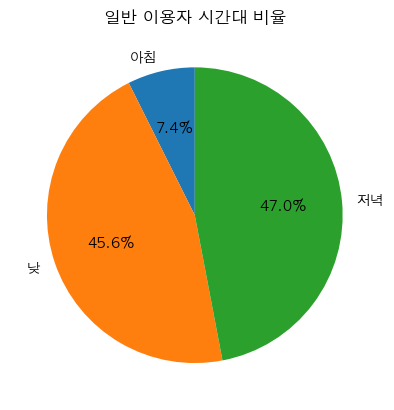

In [402]:
import matplotlib.pyplot as plt

# person_ratio의 각 시간대 비율을 추출
person_ratio_values = person_ratio.iloc[0] 

# pie chart
plt.pie(person_ratio_values, labels=person_ratio.columns, autopct='%1.1f%%', startangle=90)

# 그래프 출력
plt.title('일반 이용자 시간대 비율')
plt.show()

> 월별 데이터인 일반 이용자 시간대 비율이 저녁과 낮은 비슷하고 아침이 가장 낮은것으로 파악할 수 있다.

---
### 한강 월평균 2024 03월 ~ 09월 데이터 불러오기

In [403]:
df_2024 = pd.read_csv("../Data/한강2403-2409.csv")
df_2024

,전체 이용객,일평균 이용객,현지인 이용객,외지인 이용객,외국인 이용객,자전거 이용객,선호 연령대,선호 시간대,지점
0,"542,887","17,512","290,731","207,393",613,"44,150",50대,14시,광나루
1,"745,458","24,047","342,219","197,152",707,"205,380",0대,0시,잠실
2,"1,078,175","34,780","520,972","491,890","2,056","63,257",20대,16시,뚝섬
3,"511,550","16,502","176,502","262,437","1,821","70,790",40대,16시,잠원
4,"864,064","27,873","275,401","356,962","3,514","228,187",30대,17시,반포
...,...,...,...,...,...,...,...,...,...
72,"1,417,105","47,237","409,861","830,897","12,298","164,049",30대,12시,여의도
73,"727,580","24,253","167,580","310,342","1,432","248,226",30대,18시,양화
74,"584,387","19,480","92,221","387,289","1,753","103,124",30대,16시,난지
75,"613,938","20,465","238,024","311,864","2,433","61,617",20대,19시,망원


In [404]:
---
# Train, Test 데이터 분리
# data info 
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   전체 이용객   77 non-null     object
 1   일평균 이용객  77 non-null     object
 2   현지인 이용객  77 non-null     object
 3   외지인 이용객  77 non-null     object
 4   외국인 이용객  77 non-null     object
 5   자전거 이용객  77 non-null     object
 6   선호 연령대   77 non-null     object
 7   선호 시간대   77 non-null     object
 8   지점       77 non-null     object
dtypes: object(9)
memory usage: 5.5+ KB


In [405]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# 지점을 지점코드로 변경

# # 데이터 프레임 생성

# df = pd.DataFrame({
#     '주차장명' : df_day['주차장명'],
#     '주차대수' : df_day['주차대수'],
#     '주차장 이용시간' : df_day['주차장 이용 시간'],
#     '날짜' : df_day['날짜'],
#     '연도' : df_day['연도'],
#     '월' : df_day['월'],
#     '일' : df_day['일'],
#     '요일' : df_day['요일'],
#     '휴일여부' : df_day['휴일여부']
# })

# # 주차 공간 비율 계산
# df['주차공간비율'] = df['주차장 이용시간'] / df['주차대수']

# features = ['주차대수', '요일', '휴일여부']
# target = '주차공간비율'

# # 데이터 준비
# x = df[features]
# y = df[target]

# X_train, X_test, y_train, y_test = train_test_split(
#                                         x,
#                                         y,
#                                         test_size=0.2,
#                                         random_state=42
# )

# # 모델 학습
# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)

# # 예측
# y_pred = rf.predict(X_test)

# # 예측 결과 확인
# print(f"실제값: {y_test.values}")
# print(f"예측값: {y_pred}")

# # # Data Scaler instance 생성
# # scaler = StandardScaler()
# # # 데이터 스케일링
# # df_scaled = scaler.fit_transform(df[features])

# # # KMeans instance 생성
# # km = KMeans()
# # # K-means 군집화
# # km = KMeans(n_clusters=3, random_state=42)
# # df['K'] = km.fit_predict(df_scaled)
park_code = {'강서' : 'PLT-001', '난지' : 'PLT-002', '망원' : 'PLT-003', '이촌' : 'PLT-004', '뚝섬' : 'PLT-005', '광나루' : 'PLT-006', '양화' : 'PLT-007', '여의도' : 'PLT-008', '반포' : 'PLT-009', '잠원' : 'PLT-010', '잠실' : 'PLT-011'}

# # 데이터 확인
# df
df_2024['지점'] = df_2024['지점'].map(park_code)

In [406]:
# 월별 데이터 그룹화
month_groups = []
months = ['3', '4', '5', '6', '7', '8', '9']
num_rows_per_month = 11  # 월별로 나누는 행의 수

for i, month in enumerate(months):
    start_idx = i * num_rows_per_month
    end_idx = start_idx + num_rows_per_month
    month_group = df_2024.iloc[start_idx:end_idx].copy()
    month_group['월'] = month  # 각 그룹에 해당 월 정보를 추가
    month_groups.append(month_group)

# 월별 데이터프레임 합치기
df_2024 = pd.concat(month_groups, ignore_index=True)

# 연도 컬럼 추가
df_2024['연도'] = 2024

# 확인
df_2024

,전체 이용객,일평균 이용객,현지인 이용객,외지인 이용객,외국인 이용객,자전거 이용객,선호 연령대,선호 시간대,지점,월,연도
0,"542,887","17,512","290,731","207,393",613,"44,150",50대,14시,PLT-006,3,2024
1,"745,458","24,047","342,219","197,152",707,"205,380",0대,0시,PLT-011,3,2024
2,"1,078,175","34,780","520,972","491,890","2,056","63,257",20대,16시,PLT-005,3,2024
3,"511,550","16,502","176,502","262,437","1,821","70,790",40대,16시,PLT-010,3,2024
4,"864,064","27,873","275,401","356,962","3,514","228,187",30대,17시,PLT-009,3,2024
...,...,...,...,...,...,...,...,...,...,...,...
72,"1,417,105","47,237","409,861","830,897","12,298","164,049",30대,12시,PLT-008,9,2024
73,"727,580","24,253","167,580","310,342","1,432","248,226",30대,18시,PLT-007,9,2024
74,"584,387","19,480","92,221","387,289","1,753","103,124",30대,16시,PLT-002,9,2024
75,"613,938","20,465","238,024","311,864","2,433","61,617",20대,19시,PLT-003,9,2024


In [407]:
# 일반이용자수 계산을 위하여 데이터 변환
# regex 정규표현식 이용 
df_2024['전체 이용객'] = df_2024['전체 이용객'].replace({',':''}, regex=True).astype('int')

# 월이 원본데이터에는 int type이므로 object type을 변환
df_2024['월'] = df_2024['월'].astype('int')

# 데이터 확인
df_2024

,전체 이용객,일평균 이용객,현지인 이용객,외지인 이용객,외국인 이용객,자전거 이용객,선호 연령대,선호 시간대,지점,월,연도
0,542887,"17,512","290,731","207,393",613,"44,150",50대,14시,PLT-006,3,2024
1,745458,"24,047","342,219","197,152",707,"205,380",0대,0시,PLT-011,3,2024
2,1078175,"34,780","520,972","491,890","2,056","63,257",20대,16시,PLT-005,3,2024
3,511550,"16,502","176,502","262,437","1,821","70,790",40대,16시,PLT-010,3,2024
4,864064,"27,873","275,401","356,962","3,514","228,187",30대,17시,PLT-009,3,2024
...,...,...,...,...,...,...,...,...,...,...,...
72,1417105,"47,237","409,861","830,897","12,298","164,049",30대,12시,PLT-008,9,2024
73,727580,"24,253","167,580","310,342","1,432","248,226",30대,18시,PLT-007,9,2024
74,584387,"19,480","92,221","387,289","1,753","103,124",30대,16시,PLT-002,9,2024
75,613938,"20,465","238,024","311,864","2,433","61,617",20대,19시,PLT-003,9,2024


In [408]:
round(df_2024['전체 이용객'] * 0.074)

0      40174.0
1      55164.0
2      79785.0
3      37855.0
4      63941.0
        ...   
72    104866.0
73     53841.0
74     43245.0
75     45431.0
76     24051.0
Name: 전체 이용객, Length: 77, dtype: float64

In [409]:
# 월별로 일반이용자수(아침) , 일반이용자수(낮), 일반이용자수(저녁)으로 분리
# 곱해주는 수는 위의 시간대 비율을 이용해 곱해준다.

df_2024['일반이용자(아침)'] = round(df_2024['전체 이용객'] * 0.074)
df_2024['일반이용자(낮)'] = round(df_2024['전체 이용객'] * 0.456)
df_2024['일반이용자(저녁)'] = round(df_2024['전체 이용객'] * 0.47)

In [410]:
df_2024.rename(columns={'지점':'지구별'}, inplace=True)
df_2024 = df_2024.loc[:,['지구별','월','연도','일반이용자(아침)','일반이용자(낮)','일반이용자(저녁)']]

In [411]:
# 일별 데이터와 merge
df = pd.merge(df, df_2024, how='left', left_on=['지구별','연도','월'], right_on=['지구별','연도','월'])

In [412]:
df

,지구별,주차장명,주차대수,이용시간,날짜,연도,월,일,요일,휴일여부,...,최저기온(°C),최고기온(°C),평균 상대습도(%),일반이용자(아침)_x,일반이용자(낮)_x,일반이용자(저녁)_x,일반이용자 합계,일반이용자(아침)_y,일반이용자(낮)_y,일반이용자(저녁)_y
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,2024,11,10,6,1,...,10.3,21.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PLT-011,잠실1주차장,1059,66361,2024-11-10,2024,11,10,6,1,...,10.3,21.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PLT-001,강서1주차장,329,26875,2024-11-10,2024,11,10,6,1,...,10.3,21.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PLT-008,여의도5주차장,229,22509,2024-11-10,2024,11,10,6,1,...,10.3,21.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PLT-008,여의도2주차장,1934,150135,2024-11-10,2024,11,10,6,1,...,10.3,21.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020-01-16,2020,1,16,3,0,...,-5.5,3.2,43.0,7145.0,37903.0,31569.0,76617.0,NaN,NaN,NaN
45273,PLT-001,강서1주차장,28,347,2020-01-16,2020,1,16,3,0,...,-5.5,3.2,43.0,4515.0,42401.0,36832.0,83748.0,NaN,NaN,NaN
45274,PLT-008,여의도1주차장,114,6073,2020-01-15,2020,1,15,2,0,...,-6.4,2.2,44.8,7145.0,37903.0,31569.0,76617.0,NaN,NaN,NaN
45275,PLT-001,강서1주차장,12,68,2020-01-15,2020,1,15,2,0,...,-6.4,2.2,44.8,4515.0,42401.0,36832.0,83748.0,NaN,NaN,NaN


In [413]:
# '일반이용자(아침)_x'와 '일반이용자(아침)_y' 합치기
df['일반이용자(아침)'] = df['일반이용자(아침)_x'].fillna(df['일반이용자(아침)_y'])

# '일반이용자(낮)_x'와 '일반이용자(낮)_y' 합치기
df['일반이용자(낮)'] = df['일반이용자(낮)_x'].fillna(df['일반이용자(낮)_y'])

# '일반이용자(저녁)_x'와 '일반이용자(저녁)_y' 합치기
df['일반이용자(저녁)'] = df['일반이용자(저녁)_x'].fillna(df['일반이용자(저녁)_y'])

# 필요 없는 컬럼 삭제
df.drop(columns=['일반이용자(아침)_x', '일반이용자(아침)_y', 
                 '일반이용자(낮)_x', '일반이용자(낮)_y', 
                 '일반이용자(저녁)_x', '일반이용자(저녁)_y'], inplace=True)

df['일반이용자 합계'] = df['일반이용자(아침)'] + df['일반이용자(낮)'] + df['일반이용자(저녁)']

In [414]:
# 채운 후 일부 데이터 확인
print(df[['지구별', '주차장명', '일반이용자(아침)', '일반이용자(낮)', '일반이용자(저녁)']])

           지구별     주차장명  일반이용자(아침)  일반이용자(낮)  일반이용자(저녁)
0      PLT-005   뚝섬1주차장        NaN       NaN        NaN
1      PLT-011   잠실1주차장        NaN       NaN        NaN
2      PLT-001   강서1주차장        NaN       NaN        NaN
3      PLT-008  여의도5주차장        NaN       NaN        NaN
4      PLT-008  여의도2주차장        NaN       NaN        NaN
...        ...      ...        ...       ...        ...
45272  PLT-008  여의도1주차장     7145.0   37903.0    31569.0
45273  PLT-001   강서1주차장     4515.0   42401.0    36832.0
45274  PLT-008  여의도1주차장     7145.0   37903.0    31569.0
45275  PLT-001   강서1주차장     4515.0   42401.0    36832.0
45276  PLT-008  여의도1주차장     7145.0   37903.0    31569.0

[45277 rows x 5 columns]


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45277 entries, 0 to 45276
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   지구별           45277 non-null  object        
 1   주차장명          45277 non-null  object        
 2   주차대수          45277 non-null  int64         
 3   이용시간          45277 non-null  int64         
 4   날짜            45277 non-null  datetime64[ns]
 5   연도            45277 non-null  int32         
 6   월             45277 non-null  int32         
 7   일             45277 non-null  int32         
 8   요일            45277 non-null  int64         
 9   휴일여부          45277 non-null  int64         
 10  주차장 이용 시간(H)  45277 non-null  float64       
 11  평균기온(°C)      45277 non-null  float64       
 12  최저기온(°C)      45251 non-null  float64       
 13  최고기온(°C)      45277 non-null  float64       
 14  평균 상대습도(%)    45277 non-null  float64       
 15  일반이용자 합계      40066 non-null  float6

In [416]:
# 9월에 해당하는 데이터 필터링
september_data = df[df['월'] == 9]

# 9월 데이터에서 일반이용자 관련 컬럼만 확인
september_data[['지구별', '주차장명', '일반이용자(아침)', '일반이용자(낮)', '일반이용자(저녁)']]

,지구별,주차장명,일반이용자(아침),일반이용자(낮),일반이용자(저녁)
1148,PLT-001,강서1주차장,24051.0,148205.0,152756.0
1149,PLT-009,반포1주차장,56393.0,347505.0,358174.0
1150,PLT-010,잠원2-6주차장,31853.0,196281.0,202307.0
1151,PLT-007,양화3주차장,53841.0,331776.0,341963.0
1152,PLT-002,"난지1,2,3주차장",43245.0,266480.0,274662.0
...,...,...,...,...,...
39959,PLT-008,여의도2주차장,17950.0,116460.0,126135.0
39960,PLT-009,"반포2,3주차장",3175.0,50024.0,59454.0
39961,PLT-007,"양화3,4,5주차장",0.0,58107.0,83194.0
39962,PLT-008,여의도5주차장,17950.0,116460.0,126135.0


### 월별 평균으로 10월~11월 NaN값 처리하기
- 2020년도 부터 2024년도의 4년치의 데이터가 있습니다.
- 선형보간법을 쓰려고 했지만 앞뒤로 NaN값이 연속적으로 있으므로 부적합으로 판단,
- 전체 데이터의 약 2.5%가 NaN값 이기 때문에 월별로 평균대치법을 쓰는 것이 합리적이라고 판단

In [417]:
# NaN이 포함된 컬럼들을 확인
df[['일반이용자 합계', '일반이용자(아침)', '일반이용자(낮)', '일반이용자(저녁)']].isna().sum()

일반이용자 합계     5211
일반이용자(아침)    5211
일반이용자(낮)     5211
일반이용자(저녁)    5211
dtype: int64

In [418]:
# 월별 평균 계산
monthly_mean = df.groupby('월')[['일반이용자 합계', '일반이용자(아침)', '일반이용자(낮)', '일반이용자(저녁)']].transform('mean')

# 월별 평균으로 NaN 값 채우기
df[['일반이용자 합계', '일반이용자(아침)', '일반이용자(낮)', '일반이용자(저녁)']] = round(df[['일반이용자 합계', '일반이용자(아침)', '일반이용자(낮)', '일반이용자(저녁)']]).fillna(monthly_mean)

In [419]:
# 이용자 수가 float type으로 이기 때문에 int type으로 변환시켜준다.

df[['일반이용자 합계', '일반이용자(아침)', '일반이용자(낮)', '일반이용자(저녁)']].astype('int')

,일반이용자 합계,일반이용자(아침),일반이용자(낮),일반이용자(저녁)
0,149193,10646,67545,71001
1,149193,10646,67545,71001
2,149193,10646,67545,71001
3,149193,10646,67545,71001
4,149193,10646,67545,71001
...,...,...,...,...
45272,76617,7145,37903,31569
45273,83748,4515,42401,36832
45274,76617,7145,37903,31569
45275,83748,4515,42401,36832


In [420]:
# 최저 기온과 최고 기온은 평균기온이라는 컬럼이 있으므로 삭제
df.drop(columns=['최저기온(°C)','최고기온(°C)'], axis=1, inplace=True)

In [421]:
# 데이터 확인
df['휴일여부'].replace({2:1}, inplace=True)

In [422]:
# 데이터 저장
df.to_csv('../Data/서울 한강 일반 이용자 전처리본.csv')

### 일반이용자 평일,휴일 분리

In [423]:
print(df[df['요일'] == 0]['주차대수'].mean()) # 월요일 주차대수 평균
print(df[df['요일'] == 1]['주차대수'].mean()) # 화요일 주차대수 평균
print(df[df['요일'] == 2]['주차대수'].mean()) # 수요일 주차대수 평균
print(df[df['요일'] == 3]['주차대수'].mean()) # 목요일 주차대수 평균
print(df[df['요일'] == 4]['주차대수'].mean()) # 금요일 주차대수 평균
print(df[df['휴일여부'] == 0]['주차대수'].mean()) # 평일 주차대수 평균
print(df[df['휴일여부'] == 1]['주차대수'].mean()) # 주말 및 공휴일 주차대수 평균

800.1707430340557
791.3563484708063
826.4106839586228
820.4070429032754
898.7357736081206
810.7303129773474
1173.533223049352


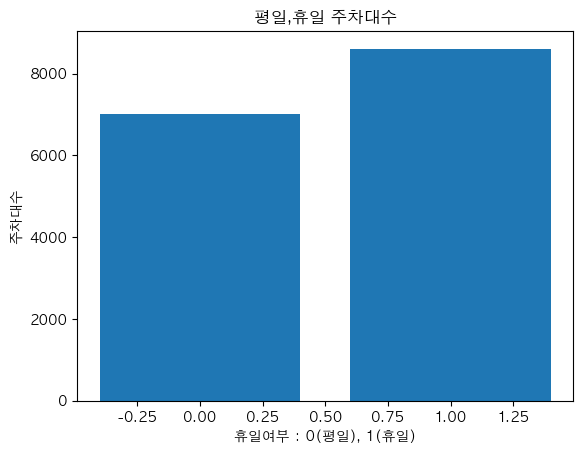

In [424]:
import matplotlib.pyplot as plt

plt.bar(
    df['휴일여부'],
    df['주차대수'],
)

plt.title('평일,휴일 주차대수')
plt.xlabel(xlabel='휴일여부 : 0(평일), 1(휴일)')
plt.ylabel(ylabel='주차대수')

plt.show()

> 평일의 주차대수 평균은 810대이고, 주말은 1183대로 차이가 있다.

---
### 인구수 데이터 변환
  현재 일반 인구수 데이터는 월별데이터이다.         
  일별로 나눠주기 위해서 데이터가 필요하지만 데이터가 없으므로,         
  휴일여부의 주차대수 비율을 기준으로 하여 나누는 방식이 적합하다고 판단하였습니다.

In [425]:
# 월, 지구별, 휴일여부별 주차대수 평균 계산
df_avg = df.groupby(['월', '지구별', '휴일여부'])['주차대수'].mean().unstack(fill_value=0)

In [426]:
# 데이터 확인하기
df_avg

휴일여부                  0            1
월  지구별                              
1  PLT-001    99.526882   193.562500
   PLT-002  1105.353659  1156.634146
   PLT-003   351.000000   631.909091
   PLT-004   276.244444   396.914286
   PLT-005   291.307910   485.295699
...                 ...          ...
12 PLT-007   249.521073   299.163636
   PLT-008   709.645977   733.972973
   PLT-009  1111.660920  1594.108108
   PLT-010  1211.689922  1530.403509
   PLT-011  2115.314050  1212.442308

[132 rows x 2 columns]

In [427]:
# 하나의 컬럼에 휴일/평일 조건에 따른 주차대수 평균 저장
df['주차대수_조건별_평균'] = df.apply(
    lambda row: df_avg.loc[row['월'], row['지구별']][1] if row['휴일여부'] == 1 else df_avg.loc[row['월'], row['지구별']][0],
    axis=1
)

In [428]:
# 월별/지구별 휴일 비율 계산
df_avg_user = df.groupby(['월', '지구별', '휴일여부'])['일반이용자 합계'].mean().unstack(fill_value=0)

In [429]:
# 데이터 확인
df_avg_user

휴일여부                    0              1
월  지구별                                  
1  PLT-001   54799.462366   56973.437500
   PLT-002   40256.902439   40700.000000
   PLT-003   79813.285714   78197.977273
   PLT-004   64512.888889   64538.535714
   PLT-005  390940.225989  401482.580645
...                   ...            ...
12 PLT-007   96958.597701   94669.927273
   PLT-008   84983.586207   82005.621622
   PLT-009  103372.816092  114819.135135
   PLT-010  125674.062522  125674.062522
   PLT-011  125674.062522  125674.062522

[132 rows x 2 columns]

In [430]:
df

,지구별,주차장명,주차대수,이용시간,날짜,연도,월,일,요일,휴일여부,주차장 이용 시간(H),평균기온(°C),평균 상대습도(%),일반이용자 합계,일반이용자(아침),일반이용자(낮),일반이용자(저녁),주차대수_조건별_평균
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,2024,11,10,6,1,381.516667,14.4,64.0,149193.226096,10646.728972,67545.463695,71001.033429,564.959459
1,PLT-011,잠실1주차장,1059,66361,2024-11-10,2024,11,10,6,1,1106.016667,14.4,64.0,149193.226096,10646.728972,67545.463695,71001.033429,1477.175439
2,PLT-001,강서1주차장,329,26875,2024-11-10,2024,11,10,6,1,447.916667,14.4,64.0,149193.226096,10646.728972,67545.463695,71001.033429,273.729730
3,PLT-008,여의도5주차장,229,22509,2024-11-10,2024,11,10,6,1,375.150000,14.4,64.0,149193.226096,10646.728972,67545.463695,71001.033429,982.518919
4,PLT-008,여의도2주차장,1934,150135,2024-11-10,2024,11,10,6,1,2502.250000,14.4,64.0,149193.226096,10646.728972,67545.463695,71001.033429,982.518919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020-01-16,2020,1,16,3,0,3691.400000,-1.7,43.0,76617.000000,7145.000000,37903.000000,31569.000000,697.893096
45273,PLT-001,강서1주차장,28,347,2020-01-16,2020,1,16,3,0,5.783333,-1.7,43.0,83748.000000,4515.000000,42401.000000,36832.000000,99.526882
45274,PLT-008,여의도1주차장,114,6073,2020-01-15,2020,1,15,2,0,101.216667,-2.7,44.8,76617.000000,7145.000000,37903.000000,31569.000000,697.893096
45275,PLT-001,강서1주차장,12,68,2020-01-15,2020,1,15,2,0,1.133333,-2.7,44.8,83748.000000,4515.000000,42401.000000,36832.000000,99.526882


> 지구별로 그룹화해서 주차대수_조건별_평균을 나누었지만 지구별로 주차장에 따라 주차대수가 다르기 때문에 다시 그룹화 해준다.

In [431]:
# 각 주차장별 주차대수 평균 계산
df['주차대수_조건별_평균'] = df.groupby(['지구별', '주차장명'])['주차대수'].transform('mean')

In [432]:
# 데이터 중간 저장
df.to_csv("../Data/한강 주차대수 통계.csv")

### 정리

- 현재 데이터에서 **주차대수**가 일별 누적 주차대수이므로, 하루 동안 누적된 주차대수를 의미한다.          
- 시간대별 점유율이나 혼잡도를 계산하는 데는 적합하지 않다고 판단합니다.              
- 시간대별 혼잡도를 추정하기 위해서는, 주차장 이용 패턴할 수 있는 추가적인 정보나 가정이 필요하지만,          
- 데이터를 찾아보려 했으나, 적절한 데이터가 없습니다. 
- 그러므로 현제 데이터에 있는 아침,낮,저녁 시간대별 일반 이용자 수가 포함되어 있기 때문에, 이를 이용해 시간대별로 혼잡도를 추정하는 방법을 사용하겠습니다.        
---

### 시간대별 비율로 나누기
- 일별 누적 주차대수를 시간대별 이용자 수 비율에 따라 나눠서 각 시간대의 주차대수를 추정.         
    $주차대수 * (일반이용자(아침,낮,저녁) / 일반이용자 합계)$
- 시간대별 일반 이용자 비율을 곱하여 아침,낮,저녁 시간대의 주차대수를 추정.

---
### 주차장별 총 주차 가능 대수 추가

In [443]:
# 주차장별 총 주차 가능 대수
total_parking_capacity = {
    '강서1주차장': 53,
    '광나루1,2주차장': 168,
    '광나루3주차장': 191,
    '난지1,2,3주차장': 544,
    '뚝섬1주차장': 67,
    '뚝섬2주차장': 356,
    '뚝섬3주차장': 112,
    '뚝섬4주차장': 136,
    '망원1주차장': 229,
    '반포1주차장': 332,
    '반포2,3주차장': 361,
    '양화1주차장': 88,
    '양화2주차장': 20,
    '양화3주차장': 393,
    '여의도1주차장': 462,
    '여의도2주차장': 171,
    '여의도3주차장': 800,
    '이촌3,4주차장': 257,
    '잠실1,2,3,4주차장': 471,
    '잠원1-6주차장': 735
}

# '주차장명'을 기준으로 '총_주차가능_대수' 컬럼 추가
df['총_주차가능_대수'] = df['주차장명'].map(total_parking_capacity)

# 확인
df[['주차장명', '총_주차가능_대수']].head()

,주차장명,총_주차가능_대수
0,뚝섬1주차장,67.0
1,잠실1주차장,NaN
2,강서1주차장,53.0
3,여의도5주차장,NaN
4,여의도2주차장,171.0


In [444]:
# 데이터 불러오기
df = pd. read_csv("../Data/한강 주차대수 통계.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df

,지구별,주차장명,주차대수,이용시간,날짜,연도,월,일,요일,휴일여부,주차장 이용 시간(H),평균기온(°C),평균 상대습도(%),일반이용자 합계,일반이용자(아침),일반이용자(낮),일반이용자(저녁),주차대수_조건별_평균
0,PLT-005,뚝섬1주차장,273,22891,2024-11-10,2024,11,10,6,1,381.516667,14.4,64.0,149193.226096,10646.728972,67545.463695,71001.033429,244.961872
1,PLT-011,잠실1주차장,1059,66361,2024-11-10,2024,11,10,6,1,1106.016667,14.4,64.0,149193.226096,10646.728972,67545.463695,71001.033429,1832.573351
2,PLT-001,강서1주차장,329,26875,2024-11-10,2024,11,10,6,1,447.916667,14.4,64.0,149193.226096,10646.728972,67545.463695,71001.033429,218.522834
3,PLT-008,여의도5주차장,229,22509,2024-11-10,2024,11,10,6,1,375.150000,14.4,64.0,149193.226096,10646.728972,67545.463695,71001.033429,290.692886
4,PLT-008,여의도2주차장,1934,150135,2024-11-10,2024,11,10,6,1,2502.250000,14.4,64.0,149193.226096,10646.728972,67545.463695,71001.033429,1146.125144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020-01-16,2020,1,16,3,0,3691.400000,-1.7,43.0,76617.000000,7145.000000,37903.000000,31569.000000,2325.947308
45273,PLT-001,강서1주차장,28,347,2020-01-16,2020,1,16,3,0,5.783333,-1.7,43.0,83748.000000,4515.000000,42401.000000,36832.000000,218.522834
45274,PLT-008,여의도1주차장,114,6073,2020-01-15,2020,1,15,2,0,101.216667,-2.7,44.8,76617.000000,7145.000000,37903.000000,31569.000000,2325.947308
45275,PLT-001,강서1주차장,12,68,2020-01-15,2020,1,15,2,0,1.133333,-2.7,44.8,83748.000000,4515.000000,42401.000000,36832.000000,218.522834


In [458]:
# 주차대수 조건별 평균을 평일, 휴일 기준으로 일별로 변환
df['주차대수_조건별_평균_일별'] = df.apply(
    lambda row: row['주차대수_조건별_평균'] / row['평일수'] if row['휴일여부'] == 0 
    else row['주차대수_조건별_평균'] / row['휴일수'], axis=1)

# 주차 가능 확률 계산을 위해 사용 가능한 주차대수를 기준으로 점유율 계산
df['주차 가능 확률'] = (df['주차대수'] / df['주차대수_조건별_평균_일별']).apply(lambda x: min(x, 1))

In [456]:
# 시간대별 비율로 일별 주차대수를 나눕니다
df['주차대수_아침_일별'] = df['주차대수'] * (df['일반이용자_아침_일별'] / df['일반이용자_합계_일별'])
df['주차대수_낮_일별'] = df['주차대수'] * (df['일반이용자_낮_일별'] / df['일반이용자_합계_일별'])
df['주차대수_저녁_일별'] = df['주차대수'] * (df['일반이용자_저녁_일별'] / df['일반이용자_합계_일별'])

# 각 시간대별 일별 점유율을 계산합니다
df['점유율_아침_일별'] = df['주차대수_아침_일별'] / df['주차대수_조건별_평균_일별']
df['점유율_낮_일별'] = df['주차대수_낮_일별'] / df['주차대수_조건별_평균_일별']
df['점유율_저녁_일별'] = df['주차대수_저녁_일별'] / df['주차대수_조건별_평균_일별']

# 결과 확인
df[['주차장명', '날짜', '주차대수', '점유율_아침_일별', '점유율_낮_일별', '점유율_저녁_일별']]

,주차장명,날짜,주차대수,점유율_아침_일별,점유율_낮_일별,점유율_저녁_일별
0,뚝섬1주차장,2024-11-10,273,0.318120,2.018233,2.121484
1,잠실1주차장,2024-11-10,1059,0.164954,1.046506,1.100044
2,강서1주차장,2024-11-10,329,0.429760,2.726504,2.865990
3,여의도5주차장,2024-11-10,229,0.224868,1.426619,1.499604
4,여의도2주차장,2024-11-10,1934,0.481672,3.055846,3.212181
...,...,...,...,...,...,...
45272,여의도1주차장,2020-01-16,873,0.420023,2.228148,1.855801
45273,강서1주차장,2020-01-16,28,0.075987,0.713601,0.619876
45274,여의도1주차장,2020-01-15,114,0.054848,0.290961,0.242338
45275,강서1주차장,2020-01-15,12,0.032566,0.305829,0.265661


In [457]:
from sklearn.cluster import KMeans

# 혼잡도 Kmeans 이용

data = df[['점유율_아침', '점유율_낮', '점유율_저녁']]

# KMeans 모델 생성 (4개의 군집: 여유, 보통, 혼잡, 만차)
kmeans = KMeans(n_clusters=4, random_state=42)
df['혼잡도_군집'] = kmeans.fit_predict(data)

# KMeans 클러스터 결과를 기반으로 군집 레이블 부여
# KMeans 결과는 군집 번호(0, 1, 2, 3)
cluster_labels = ['여유', '보통', '혼잡', '만차']
df['혼잡도_군집_명칭'] = df['혼잡도_군집'].apply(lambda x: cluster_labels[x])

# 결과 확인
print(df[['주차장명', '날짜', '점유율_아침', '점유율_낮', '점유율_저녁', '혼잡도_군집_명칭']].head())


      주차장명          날짜    점유율_아침     점유율_낮    점유율_저녁 혼잡도_군집_명칭
0   뚝섬1주차장  2024-11-10  0.079530  0.504558  0.530371        만차
1   잠실1주차장  2024-11-10  0.041238  0.261626  0.275011        여유
2   강서1주차장  2024-11-10  0.107440  0.681626  0.716497        만차
3  여의도5주차장  2024-11-10  0.056217  0.356655  0.374901        여유
4  여의도2주차장  2024-11-10  0.120418  0.763962  0.803045        보통


In [462]:
df.columns

Index(['지구별', '주차장명', '주차대수', '이용시간', '연도', '월', '일', '요일', '휴일여부',
       '주차장 이용 시간(H)', '평균기온(°C)', '평균 상대습도(%)', '혼잡도_군집', '혼잡도_군집_명칭', '평일수',
       '휴일수', '주차대수_조건별_평균_일별', '주차 가능 확률', '일반이용자_합계_일별', '일반이용자_아침_일별',
       '일반이용자_낮_일별', '일반이용자_저녁_일별', '주차대수_아침_일별', '주차대수_낮_일별', '주차대수_저녁_일별',
       '점유율_아침_일별', '점유율_낮_일별', '점유율_저녁_일별'],
      dtype='object')

In [461]:
# 일반이용자 합계와 일반이용자_아침,낮,저녁은 월별데이터이고, 일별 컬럼을 만들었으니 삭제한다. 
# 주차대수(아침,낮,저녁) 조건별 평균, 점유율(아침,낮,저녁)도 삭제
drop_column = ['날짜','일반이용자 합계','일반이용자(아침)','일반이용자(낮)','일반이용자(저녁)','주차대수_조건별_평균','주차대수_아침','주차대수_낮','주차대수_저녁','점유율_아침','점유율_낮','점유율_저녁']
df.drop(columns=drop_column,inplace=True)


In [464]:
df

,지구별,주차장명,주차대수,이용시간,연도,월,일,요일,휴일여부,주차장 이용 시간(H),...,일반이용자_합계_일별,일반이용자_아침_일별,일반이용자_낮_일별,일반이용자_저녁_일별,주차대수_아침_일별,주차대수_낮_일별,주차대수_저녁_일별,점유율_아침_일별,점유율_낮_일별,점유율_저녁_일별
0,PLT-005,뚝섬1주차장,273,22891,2024,11,10,6,1,381.516667,...,37298.306524,2661.682243,16886.365924,17750.258357,19.481830,123.597512,129.920658,0.318120,2.018233,2.121484
1,PLT-011,잠실1주차장,1059,66361,2024,11,10,6,1,1106.016667,...,37298.306524,2661.682243,16886.365924,17750.258357,75.572372,479.449690,503.977938,0.164954,1.046506,1.100044
2,PLT-001,강서1주차장,329,26875,2024,11,10,6,1,447.916667,...,37298.306524,2661.682243,16886.365924,17750.258357,23.478102,148.950848,156.571050,0.429760,2.726504,2.865990
3,PLT-008,여의도5주차장,229,22509,2024,11,10,6,1,375.150000,...,37298.306524,2661.682243,16886.365924,17750.258357,16.341901,103.677034,108.981065,0.224868,1.426619,1.499604
4,PLT-008,여의도2주차장,1934,150135,2024,11,10,6,1,2502.250000,...,37298.306524,2661.682243,16886.365924,17750.258357,138.014134,875.595563,920.390304,0.481672,3.055846,3.212181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020,1,16,3,0,3691.400000,...,6384.750000,595.416667,3158.583333,2630.750000,81.412546,431.879596,359.707859,0.420023,2.228148,1.855801
45273,PLT-001,강서1주차장,28,347,2020,1,16,3,0,5.783333,...,7613.454545,410.454545,3854.636364,3348.363636,1.509529,14.176195,12.314276,0.075987,0.713601,0.619876
45274,PLT-008,여의도1주차장,114,6073,2020,1,15,2,0,101.216667,...,6384.750000,595.416667,3158.583333,2630.750000,10.631192,56.396648,46.972160,0.054848,0.290961,0.242338
45275,PLT-001,강서1주차장,12,68,2020,1,15,2,0,1.133333,...,7613.454545,410.454545,3854.636364,3348.363636,0.646941,6.075512,5.277547,0.032566,0.305829,0.265661


In [453]:
# 데이터 최종 정보 확인
print(df.info())

# 데이터 통계량 확인
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45277 entries, 0 to 45276
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   지구별             45277 non-null  object 
 1   주차장명            45277 non-null  object 
 2   주차대수            45277 non-null  int64  
 3   이용시간            45277 non-null  int64  
 4   날짜              45277 non-null  object 
 5   연도              45277 non-null  int64  
 6   월               45277 non-null  int64  
 7   일               45277 non-null  int64  
 8   요일              45277 non-null  int64  
 9   휴일여부            45277 non-null  int64  
 10  주차장 이용 시간(H)    45277 non-null  float64
 11  평균기온(°C)        45277 non-null  float64
 12  평균 상대습도(%)      45277 non-null  float64
 13  일반이용자 합계        45277 non-null  float64
 14  일반이용자(아침)       45277 non-null  float64
 15  일반이용자(낮)        45277 non-null  float64
 16  일반이용자(저녁)       45277 non-null  float64
 17  주차대수_조건별_평균     45277 non-null 

,주차대수,이용시간,연도,월,일,요일,휴일여부,주차장 이용 시간(H),평균기온(°C),평균 상대습도(%),...,점유율_저녁,혼잡도_군집,평일수,휴일수,주차대수_조건별_평균_일별,주차 가능 확률,일반이용자_합계_일별,일반이용자_아침_일별,일반이용자_낮_일별,일반이용자_저녁_일별
count,45277.000000,45277.000000,45277.000000,45277.000000,45277.00000,45277.000000,45277.000000,45277.000000,45277.000000,45277.000000,...,45277.000000,45277.000000,45277.000000,45277.000000,45277.000000,45277.000000,45277.000000,45277.000000,45277.000000,45277.000000
mean,926.982375,87962.631579,2022.038408,6.428739,15.78806,2.995384,0.320428,1466.043860,14.251662,65.288084,...,0.481439,1.365947,20.235638,9.518917,63.548960,0.997280,21819.240500,1501.059576,9545.976442,10772.204481
std,956.831267,98191.090369,1.388780,3.368428,8.83966,1.995655,0.466646,1636.518173,10.379579,14.101320,...,0.279461,1.384729,2.307406,1.468212,67.657449,0.045561,25766.846169,2164.811943,11517.509533,13421.691542
min,1.000000,0.000000,2020.000000,1.000000,1.00000,0.000000,0.000000,0.000000,-14.900000,17.900000,...,0.000239,0.000000,0.000000,0.000000,2.612344,0.001601,850.409091,0.000000,374.590909,175.550000
25%,258.000000,21150.000000,2021.000000,4.000000,8.00000,1.000000,0.000000,352.500000,6.000000,55.300000,...,0.291124,0.000000,19.000000,9.000000,16.954621,1.000000,5681.111111,278.500000,2523.421053,2498.303720
50%,598.000000,53815.000000,2022.000000,6.000000,16.00000,3.000000,0.000000,896.916667,15.400000,65.600000,...,0.424996,1.000000,21.000000,10.000000,40.898392,1.000000,12817.250000,726.875000,5384.210526,5932.625000
75%,1263.000000,113438.000000,2023.000000,9.000000,23.00000,5.000000,1.000000,1890.633333,23.300000,75.100000,...,0.594421,3.000000,22.000000,11.000000,88.504938,1.000000,27732.348581,1774.454829,12106.818182,13060.454545
max,8606.000000,668970.000000,2024.000000,12.000000,31.00000,6.000000,1.000000,11149.500000,31.800000,99.300000,...,4.691347,3.000000,23.000000,12.000000,916.286676,1.000000,526914.623030,34970.035800,244310.978627,247633.608603


---
# EDA

### 타겟 변수(주차대수)분석

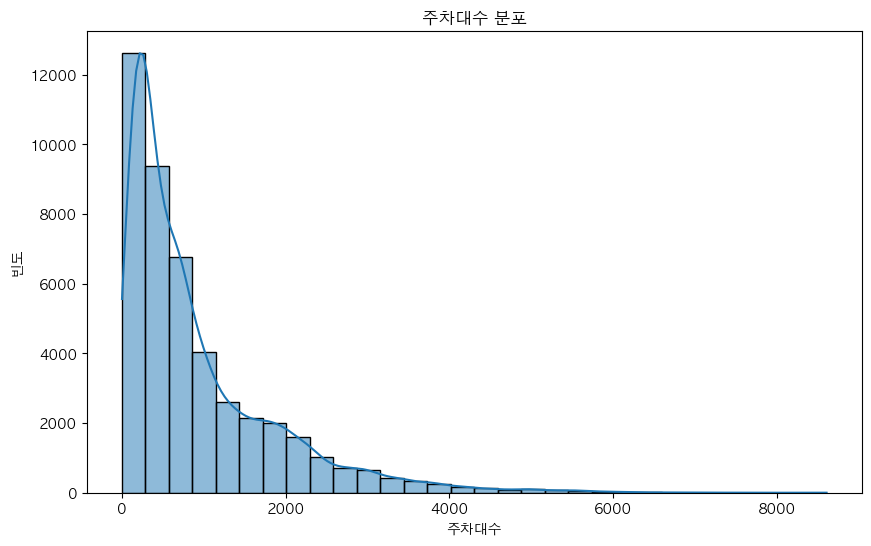

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주차대수의 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['주차대수'], bins=30, kde=True)
plt.title('주차대수 분포')
plt.xlabel('주차대수')
plt.ylabel('빈도')
plt.show()

# 지구별 주차대수 평균 확인
geo_mean_parking = df.groupby('지구별')['주차대수'].mean()

# 주차장명별 주차대수 평균 확인
parking_lot_mean = df.groupby('주차장명')['주차대수'].mean()


주차대수 분포 분석:       
주차대수는 오른쪽으로 길게 늘어진 분포(Positive Skew)를 보입니다.           
대부분의 주차장은 낮은 주차대수를 기록하고, 일부는 매우 높은 주차대수를 보입니다.           
많은 데이터가 0에 가깝고, 특정 주차장만 높은 주차량을 기록합니다.               

이상치:         
주차대수가 8000 이상인 데이터는 이상치로 간주될 가능성이 높습니다.          
모델링 시 정확도 저하를 방지하기 위해 이상치 처리 필요.     

모델링 시 고려 사항:            
주차대수 분포가 왜곡되어 있으므로 로그 변환 등의 정규화를 고려해야 합니다.          
추가적으로 휴일/평일, 특정 시간대, 지구별 차이에 따른 주차대수 변화를 분석해야 합니다.          

### 시간대 및 휴일 여부에 따른 주차대수 패턴 분석

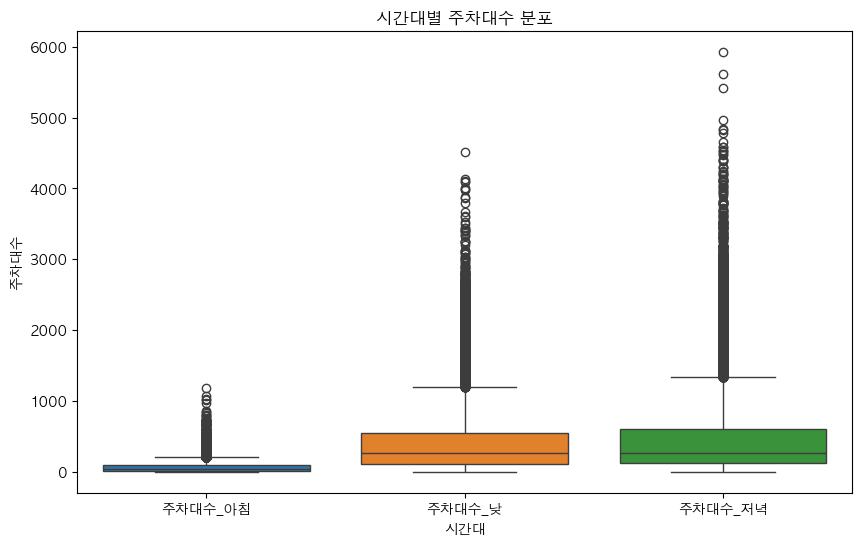

휴일여부
0     810.730313
1    1173.533223
Name: 주차대수, dtype: float64


In [ ]:
# 시간대별 주차대수 분포
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['주차대수_아침', '주차대수_낮', '주차대수_저녁']])
plt.title('시간대별 주차대수 분포')
plt.xlabel('시간대')
plt.ylabel('주차대수')
plt.show()

# 휴일 여부에 따른 주차대수 평균 비교
holiday_mean = df.groupby('휴일여부')['주차대수'].mean()
print(holiday_mean)

시간대별 특징:          
아침 시간대: 주차대수 분포가 매우 낮고 대부분의 데이터가 1000 이하에 집중되어 있습니다. 아침 시간대에는 주차량이 적은 경향이 있습니다.          
낮 시간대: 주차대수가 급증하여 범위가 넓고 이상치도 많이 보입니다. 낮에는 주차 수요가 가장 높으며 변동 폭도 큽니다.         
저녁 시간대: 낮보다는 적지만 여전히 높은 주차대수를 기록합니다. 이상치도 낮 시간대만큼 존재합니다.          

이상치 존재:            
모든 시간대에서 이상치가 확인되며 특히 낮과 저녁 시간대에서 눈에 띄는 수준으로 나타나고 있습니다.           
낮 시간대에 주차대수의 분산이 가장 크고, 많은 이상치가 있습니다.            

분석 결과 요약:         
낮과 저녁 시간대의 주차 수요가 아침에 비해 훨씬 높고 변동성이 큽니다.           
시간대별로 주차대수 차이가 크므로, 이를 고려한 시간대별 모델링이 필요합니다.            
주차대수의 이상치는 모델링에 영향을 줄 수 있어 처리 필요.           

### 주차장 이용 시간 및 기상 데이터 분석

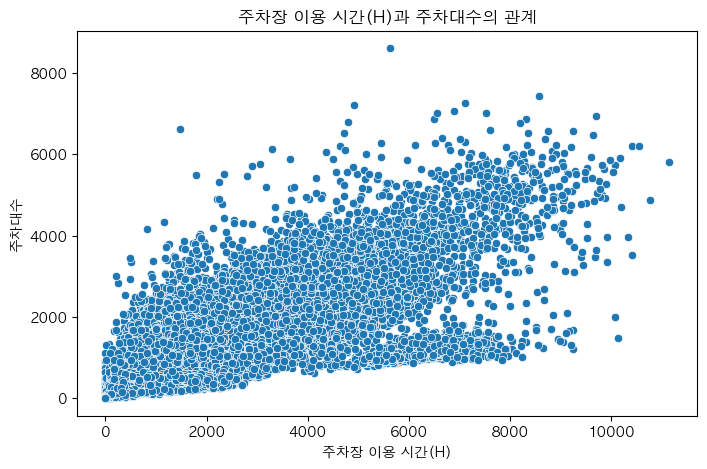

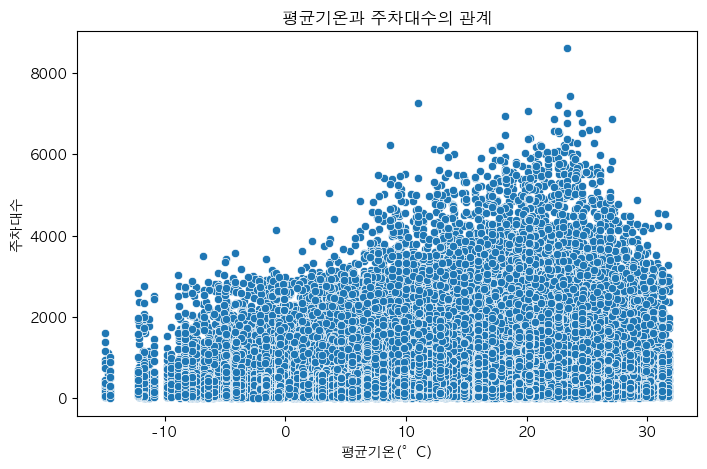

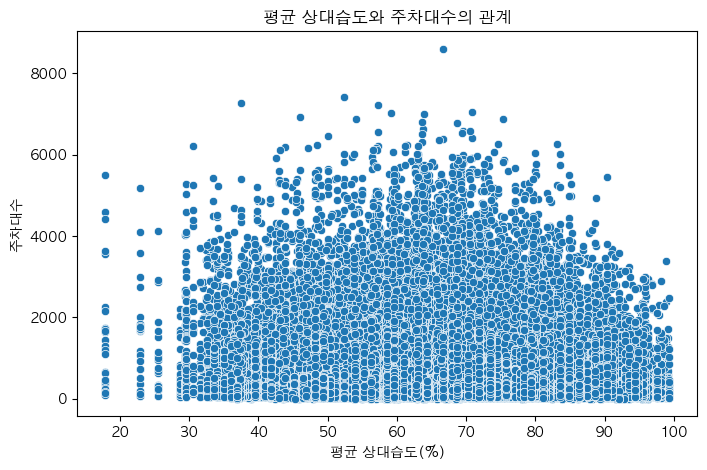

In [ ]:
# 주차장 이용 시간(H)과 주차대수 간의 상관관계
plt.figure(figsize=(8, 5))
sns.scatterplot(x='주차장 이용 시간(H)', y='주차대수', data=df)
plt.title('주차장 이용 시간(H)과 주차대수의 관계')
plt.xlabel('주차장 이용 시간(H)')
plt.ylabel('주차대수')
plt.show()

# 평균기온과 주차대수의 관계
plt.figure(figsize=(8, 5))
sns.scatterplot(x='평균기온(°C)', y='주차대수', data=df)
plt.title('평균기온과 주차대수의 관계')
plt.xlabel('평균기온(°C)')
plt.ylabel('주차대수')
plt.show()

# 평균 상대습도와 주차대수의 관계
plt.figure(figsize=(8, 5))
sns.scatterplot(x='평균 상대습도(%)', y='주차대수', data=df)
plt.title('평균 상대습도와 주차대수의 관계')
plt.xlabel('평균 상대습도(%)')
plt.ylabel('주차대수')
plt.show()

주차장 이용 시간(H)과 주차대수의 관계:      
양의 상관관계: 주차장 이용 시간이 증가할수록 주차대수도 증가하는 경향이 나타납니다.         
긴 이용 시간: 주차장 이용 시간이 길어지면 주차대수가 많아지는 경향이 강해 보이며, 이는 이용자가 오랜 시간 동안 주차장에 머무르는 경우가 많음을 의미합니다.      
분포의 확산: 주차장 이용 시간이 증가할수록 주차대수의 분포가 확산되는 모습을 보여, 일정 이상의 주차장 이용 시간은 다양한 주차 수요를 반영합니다.        

평균기온과 주차대수의 관계:         
온도와 주차대수의 증가: 온도가 약 0도에서 20도 사이일 때 주차대수가 증가하는 경향이 보입니다. 이는 해당 기온이 사람들이 한강 공원을 방문하기에 적합한 기온으로 작용한 것으로 해석됩니다.        
고온과 주차대수 감소: 30도 이상의 높은 온도에서는 주차대수가 감소하는 경향이 보이며, 이는 더운 날씨로 인해 사람들이 야외 활동을 줄이는 것을 의미합니다.         
온도 변화에 따른 주차대수 변화: 평균기온이 낮거나 높은 경우 주차 수요가 줄어드는 모습을 보여, 모델링 시 기온에 따른 변화도 고려해야 할 필요가 있습니다.         

평균 상대습도와 주차대수의 관계:            
상대습도와 주차대수의 약한 상관관계: 평균 상대습도와 주차대수 사이에는 뚜렷한 상관관계가 보이지 않습니다. 하지만, 상대습도 40~70% 구간에서 주차대수가 상대적으로 높게 나타나는 경향이 있습니다.     
이상치 분포: 일부 상대습도 값에서 높은 주차대수가 관찰되며, 이는 특정 날씨 상황에서 주차 수요가 급격히 증가한 경우로 해석될 수 있습니다.            
습도에 따른 영향: 습도는 주차 수요에 큰 영향을 주는 변수는 아니지만, 날씨 요인으로 인해 영향을 받을 수 있으므로 추가적인 요인 분석이 필요합니다.        


In [ ]:
# 평균 상대습도는 상관관계가 약하므로 Data에서 Drop
df.drop(columns='평균 상대습도(%)', inplace=True)

### 혼잡도 분석

In [ ]:
df.columns

Index(['지구별', '주차장명', '주차대수', '이용시간', '날짜', '연도', '월', '일', '요일', '휴일여부',
       '주차장 이용 시간(H)', '평균기온(°C)', '일반이용자 합계', '일반이용자(아침)', '일반이용자(낮)',
       '일반이용자(저녁)', '주차대수_조건별_평균', '주차대수_아침', '주차대수_낮', '주차대수_저녁', '점유율_아침',
       '점유율_낮', '점유율_저녁', '혼잡도_군집', '혼잡도_군집_명칭'],
      dtype='object')

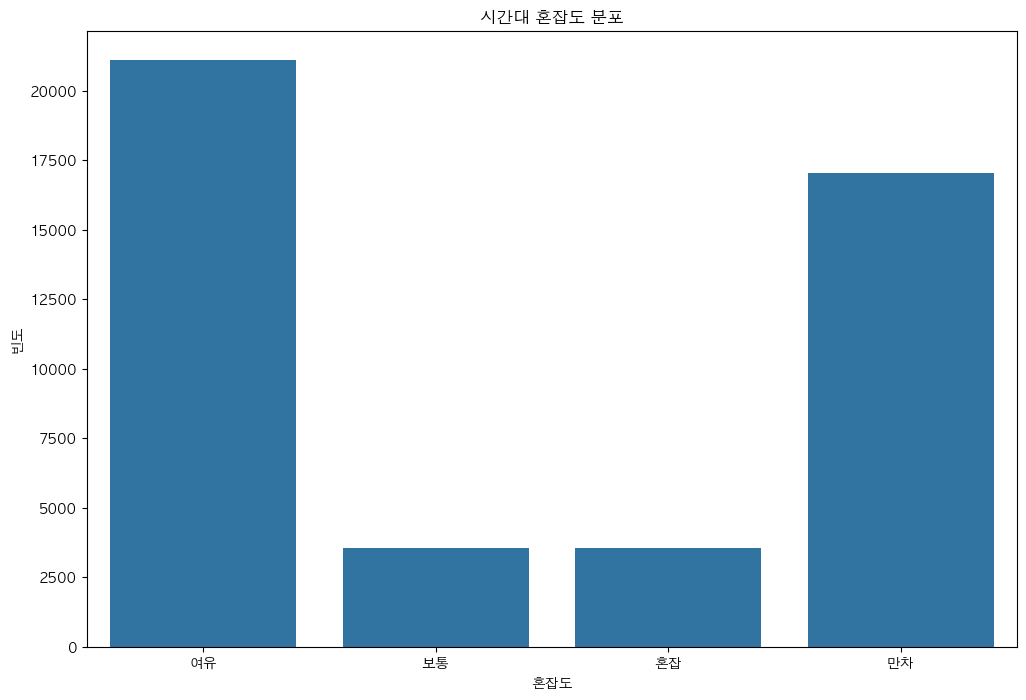

In [ ]:
# 시간대별 혼잡도 분포 확인 (데이터프레임에 실 데이터를 채워주세요)
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='혼잡도_군집_명칭', order=['여유', '보통', '혼잡', '만차'])
plt.title('시간대 혼잡도 분포')
plt.xlabel('혼잡도')
plt.ylabel('빈도')
plt.show()

혼잡도 분포:
- 여유와 만차 상태가 가장 많으며, 보통과 혼잡은 상대적으로 적은 것을 알 수 있다.
- 특히 여유 상태가 가장 많으므로 주차장의 혼잡도가 대부분 낮음을 알 수 있다.

주차장 상태 편향:
- 여유와 만차에 집중된 경향을 보임
- 이는 특정 시간대 또는 특정 날에는 주차장이 많이 비어 있거나 반대로 꽉차는 상황이 많다는 의미.

### 일반이용자와 주차대수의 관계 분석

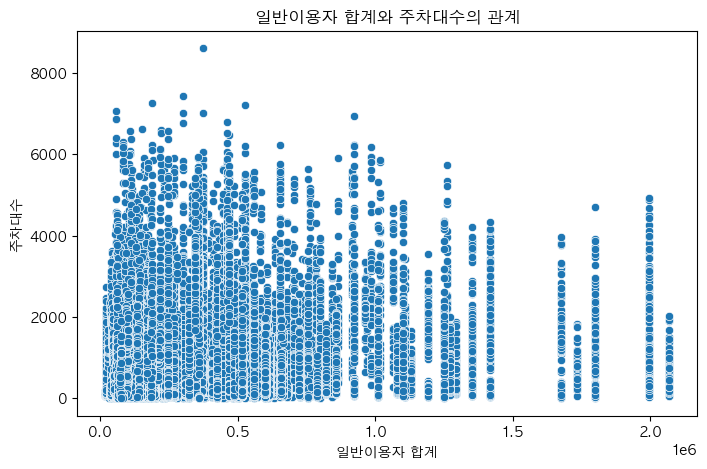

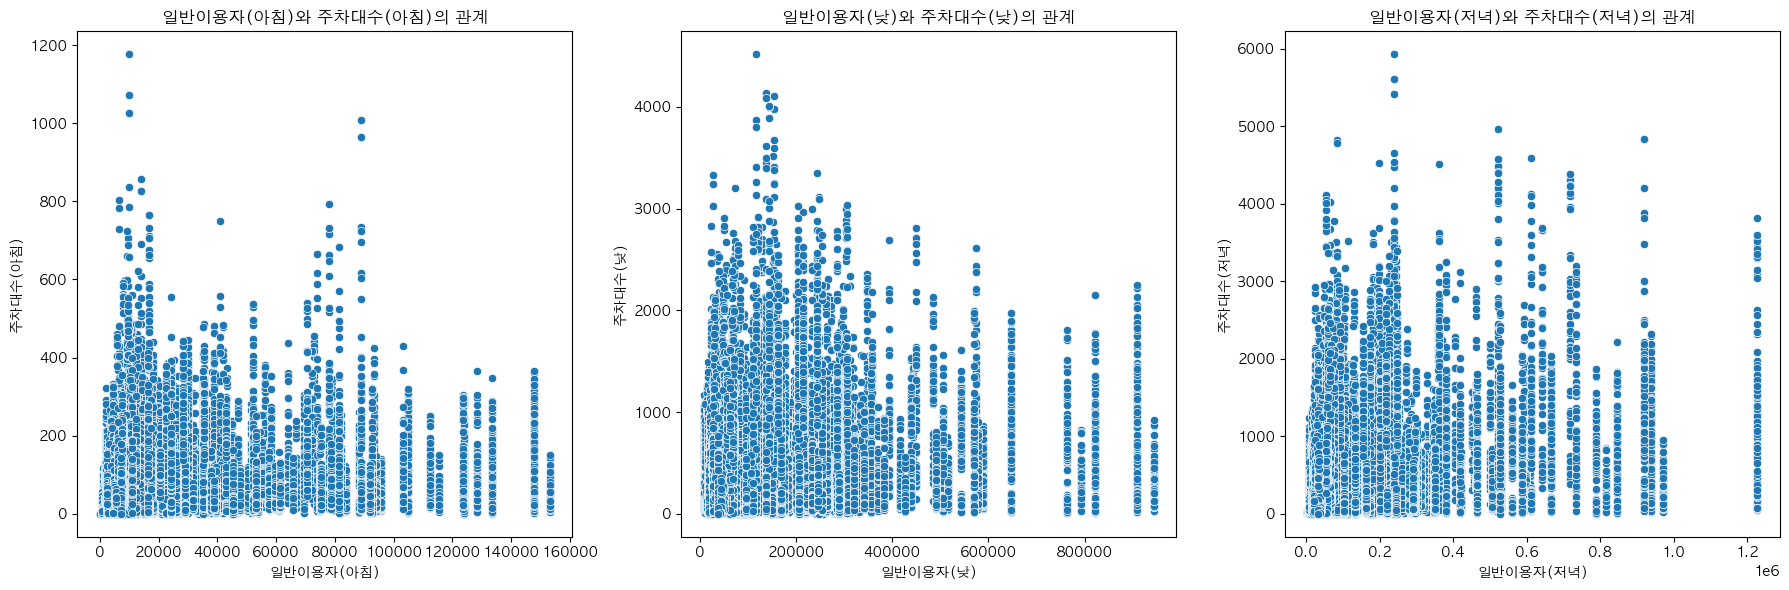

In [ ]:
# 일반이용자 합계와 주차대수 간의 상관관계
plt.figure(figsize=(8, 5))
sns.scatterplot(x='일반이용자 합계', y='주차대수', data=df)
plt.title('일반이용자 합계와 주차대수의 관계')
plt.xlabel('일반이용자 합계')
plt.ylabel('주차대수')
plt.show()

# 시간대별 일반이용자와 주차대수 간의 상관관계
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
time_of_day = ['아침', '낮', '저녁']
for i, time in enumerate(time_of_day):
    sns.scatterplot(x=f'일반이용자({time})', y=f'주차대수_{time}', data=df, ax=axes[i])
    axes[i].set_title(f'일반이용자({time})와 주차대수({time})의 관계')
    axes[i].set_xlabel(f'일반이용자({time})')
    axes[i].set_ylabel(f'주차대수({time})')
plt.tight_layout()
plt.show()

> 일반이용자 수와 주차대수는 대체로 양의 상관관계를 가지지만, 그 상관성이 시간대별로 다르게 나타나는 것이 특징입니다.       
특히, 낮과 저녁 시간대에 주차대수가 많이 증가하는 경향을 보이며, 아침 시간대에는 상대적으로 낮은 주차 수요가 나타납니다.            
각 시간대별 주차 수요를 예측하고 혼잡도를 분석하는 데 유의미한 정보를 제공합니다.           

### 지구별 주차대수 관계 분석

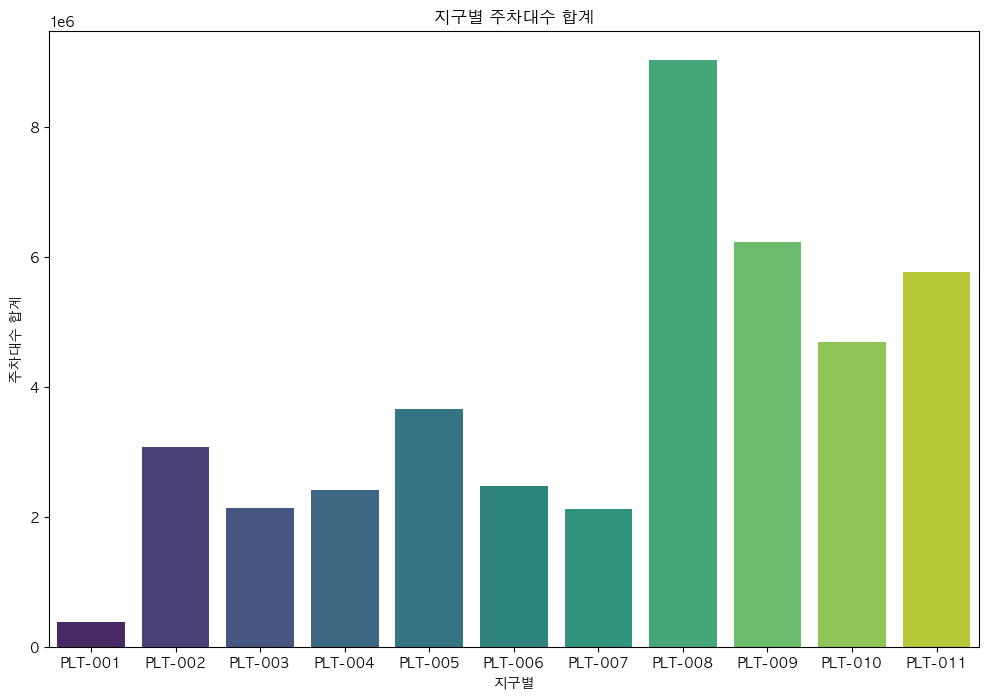

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# 지구별 주차대수 합계
plt.figure(figsize=(12, 8))
geo_sum = df.groupby('지구별')['주차대수'].sum().reset_index()
sns.barplot(data=geo_sum, x='지구별', y='주차대수', palette='viridis')
plt.title('지구별 주차대수 합계')
plt.xlabel('지구별')
plt.ylabel('주차대수 합계')
plt.show()


> 지구별로 주차대수 합계를 보았을 때 PLT-008여의도가 가장 많은 주차대수 합계를 나타내는 것을 알 수 있다.

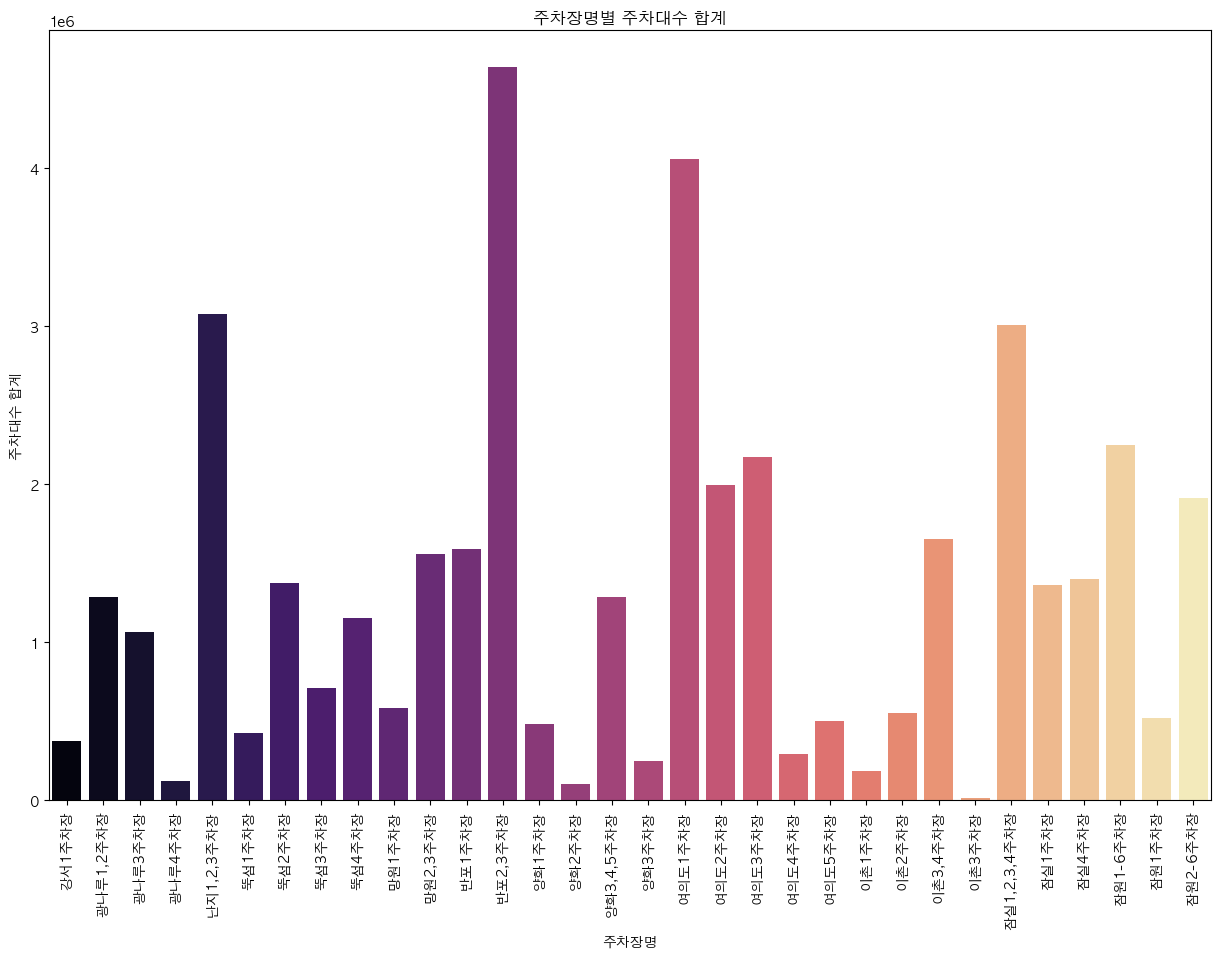

In [ ]:
# 주차장명별 주차대수 합계
plt.figure(figsize=(15, 10))
parking_sum = df.groupby('주차장명')['주차대수'].sum().reset_index()
sns.barplot(data=parking_sum, x='주차장명', y='주차대수', palette='magma')
plt.title('주차장명별 주차대수 합계')
plt.xlabel('주차장명')
plt.ylabel('주차대수 합계')
plt.xticks(rotation=90)
plt.show()

> 주차장명별로 주차대수를 보았을때는 반포2,3 주차장이 가장 많은것으로 파악된다.

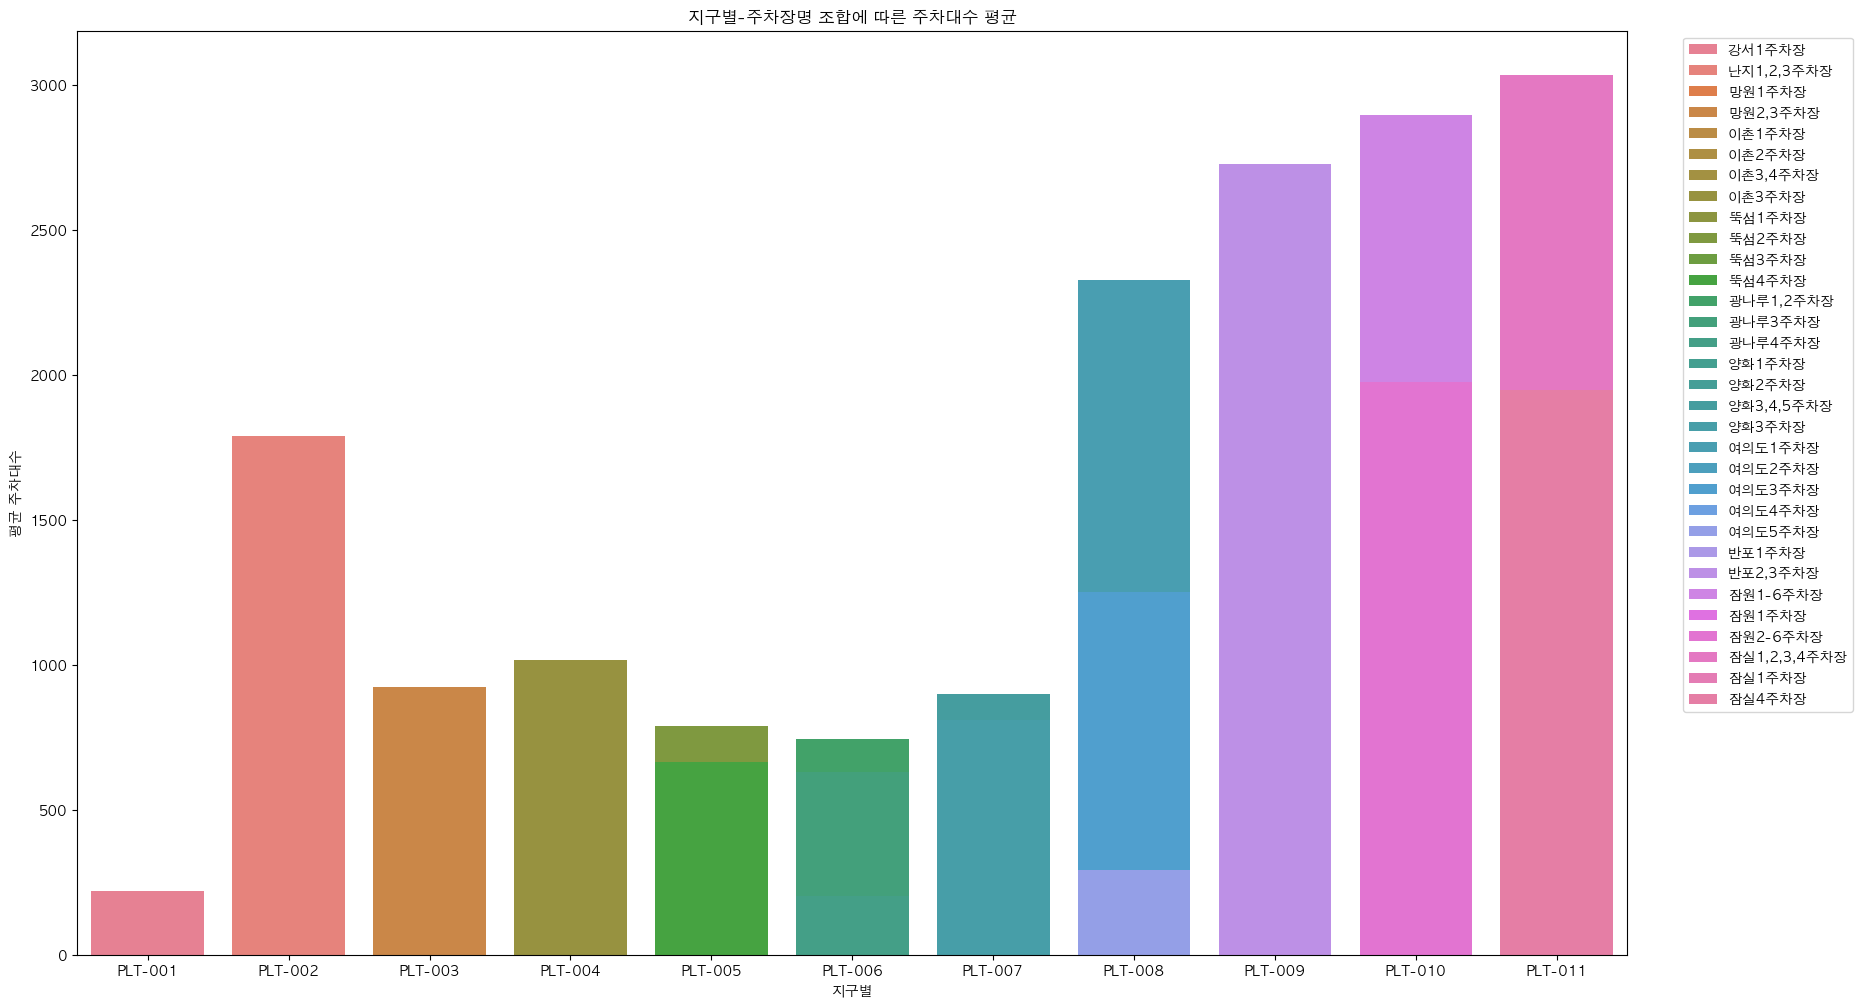

In [ ]:
# 지구별-주차장명 조합에 따른 주차대수 평균
plt.figure(figsize=(20, 12))
geo_parking_mean = df.groupby(['지구별', '주차장명'])['주차대수'].mean().reset_index()
sns.barplot(data=geo_parking_mean, x='지구별', y='주차대수', hue='주차장명', dodge=False)
plt.title('지구별-주차장명 조합에 따른 주차대수 평균')
plt.xlabel('지구별')
plt.ylabel('평균 주차대수')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

> 주차장이 많은 지구가 평균 주차대수가 높게 나타내는 경향이 있습니다.   
이로 인해 넓은 주차 공간을 가진 지구가 더 많은 방문객을 유치할 가능성이 있음을 알 수 있다.

---
# 모델링 준비

In [ ]:
df.columns

Index(['지구별', '주차장명', '주차대수', '이용시간', '날짜', '연도', '월', '일', '요일', '휴일여부',
       '주차장 이용 시간(H)', '평균기온(°C)', '평균 상대습도(%)', '일반이용자 합계', '일반이용자(아침)',
       '일반이용자(낮)', '일반이용자(저녁)', '주차대수_조건별_평균', '주차대수_아침', '주차대수_낮', '주차대수_저녁',
       '점유율_아침', '점유율_낮', '점유율_저녁', '혼잡도_군집', '혼잡도_군집_명칭'],
      dtype='object')

In [ ]:
# 모델링을 하기위해서는 지구별과 주차장명을 int로 type 변환을 해줘야한다.
from sklearn.preprocessing import LabelEncoder

# 지구별, 주차장명 변환을 위한 LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 지구별과 주차장명을 정수형으로 변환
df['지구별_encoded'] = label_encoder.fit_transform(df['지구별'])
df['주차장명_encoded'] = label_encoder.fit_transform(df['주차장명'])

In [ ]:
# 실시간 데이터에 없는 주차장명_encoded 값들을 제거합니다.
duplicate_values = [3, 10, 15, 20, 21, 22, 23, 25, 27, 28, 30, 31]
df = df[~df['주차장명_encoded'].isin(duplicate_values)]

# 결과 확인
df.reset_index(drop=True, inplace=True)
df

,지구별,주차장명,주차대수,이용시간,연도,월,일,요일,휴일여부,주차장 이용 시간(H),...,혼잡도_군집_명칭,지구별_encoded,주차장명_encoded,일반이용자_아침_일별,일반이용자_낮_일별,일반이용자_저녁_일별,평일수,휴일수,주차대수_조건별_평균_일별,주차 가능 확률
0,PLT-005,뚝섬1주차장,273,22891,2024,11,10,6,1,381.516667,...,만차,4,5,2661.682243,16886.365924,17750.258357,6,4,61.240468,1.000000
1,PLT-001,강서1주차장,329,26875,2024,11,10,6,1,447.916667,...,만차,0,0,2661.682243,16886.365924,17750.258357,6,4,54.630708,1.000000
2,PLT-008,여의도2주차장,1934,150135,2024,11,10,6,1,2502.250000,...,보통,7,18,2661.682243,16886.365924,17750.258357,6,4,286.531286,1.000000
3,PLT-007,양화1주차장,384,31676,2024,11,10,6,1,527.933333,...,만차,6,13,2661.682243,16886.365924,17750.258357,6,4,69.363531,1.000000
4,PLT-007,양화2주차장,88,10081,2024,11,10,6,1,168.016667,...,만차,6,14,2661.682243,16886.365924,17750.258357,6,4,15.020978,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31386,PLT-008,여의도1주차장,873,221484,2020,1,16,3,0,3691.400000,...,여유,7,17,595.416667,3158.583333,2630.750000,12,6,193.828942,1.000000
31387,PLT-001,강서1주차장,28,347,2020,1,16,3,0,5.783333,...,여유,0,0,410.454545,3854.636364,3348.363636,11,6,19.865712,1.000000
31388,PLT-008,여의도1주차장,114,6073,2020,1,15,2,0,101.216667,...,여유,7,17,595.416667,3158.583333,2630.750000,12,6,193.828942,0.588147
31389,PLT-001,강서1주차장,12,68,2020,1,15,2,0,1.133333,...,여유,0,0,410.454545,3854.636364,3348.363636,11,6,19.865712,0.604056


In [449]:
# 월별데이터인 일반 이용자를 평일/휴일 기준으로 일별 분배
df['평일수'] = df.groupby(['연도','월','지구별','주차장명'])['휴일여부'].transform(lambda x: (x==0).sum())
df['휴일수'] = df.groupby(['연도','월','지구별','주차장명'])['휴일여부'].transform(lambda x: (x==1).sum())

In [451]:
# 일별로 일반이용자 데이터를 분배

def distribution(row, column_name, 평일수_column='평일수', 휴일수_column='휴일수'):
    if row['휴일여부'] == 1:  # 휴일인 경우
        return row[column_name] / row[휴일수_column]
    else:  # 평일인 경우
        return row[column_name] / row[평일수_column]

df['일반이용자_합계_일별'] = df.apply(lambda row: distribution(row, '일반이용자 합계'), axis=1)
df['일반이용자_아침_일별'] = df.apply(lambda row: distribution(row, '일반이용자(아침)'), axis=1)
df['일반이용자_낮_일별'] = df.apply(lambda row: distribution(row, '일반이용자(낮)'), axis=1)
df['일반이용자_저녁_일별'] = df.apply(lambda row: distribution(row, '일반이용자(저녁)'), axis=1)

In [452]:
df.columns

Index(['지구별', '주차장명', '주차대수', '이용시간', '날짜', '연도', '월', '일', '요일', '휴일여부',
       '주차장 이용 시간(H)', '평균기온(°C)', '평균 상대습도(%)', '일반이용자 합계', '일반이용자(아침)',
       '일반이용자(낮)', '일반이용자(저녁)', '주차대수_조건별_평균', '주차대수_아침', '주차대수_낮', '주차대수_저녁',
       '점유율_아침', '점유율_낮', '점유율_저녁', '혼잡도_군집', '혼잡도_군집_명칭', '평일수', '휴일수',
       '주차대수_조건별_평균_일별', '주차 가능 확률', '일반이용자_합계_일별', '일반이용자_아침_일별',
       '일반이용자_낮_일별', '일반이용자_저녁_일별'],
      dtype='object')

In [ ]:
# 일반이용자 일별컬럼을 만들었으므로 월별 이용자 컬럼은 삭제한다.
month_columns = ['일반이용자(아침)','일반이용자(낮)','일반이용자(저녁)']
df.drop(columns=month_columns, inplace=True)

In [ ]:
# 점유율 관련 컬럼 있으므로 주차대수(아침,낮,저녁) 컬럼 삭제
car_columns = ['주차대수_아침','주차대수_낮','주차대수_저녁']
df.drop(columns=car_columns, inplace=True)

In [ ]:
# 일일 이용자 컬럼을 만들었으므로 평일수, 휴일수 컬럼은 삭제
week_columns = ['평일수','휴일수']
df.drop(columns=week_columns, inplace=True)

In [ ]:
# 날짜 컬럼은 연도 월 일로 쪼갰기 때문에 날짜 컬럼 삭제
df.drop(columns='날짜', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45277 entries, 0 to 45276
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지구별           45277 non-null  object 
 1   주차장명          45277 non-null  object 
 2   주차대수          45277 non-null  int64  
 3   이용시간          45277 non-null  int64  
 4   날짜            45277 non-null  object 
 5   연도            45277 non-null  int64  
 6   월             45277 non-null  int64  
 7   일             45277 non-null  int64  
 8   요일            45277 non-null  int64  
 9   휴일여부          45277 non-null  int64  
 10  주차장 이용 시간(H)  45277 non-null  float64
 11  평균기온(°C)      45277 non-null  float64
 12  일반이용자 합계      45277 non-null  float64
 13  주차대수_조건별_평균   45277 non-null  float64
 14  점유율_아침        45277 non-null  float64
 15  점유율_낮         45277 non-null  float64
 16  점유율_저녁        45277 non-null  float64
 17  혼잡도_군집        45277 non-null  int32  
 18  혼잡도_군집_명칭     45277 non-nu

In [ ]:
df.to_csv("../Data/서울시 한강 공원 데이터.csv")

---
# 모델링

In [ ]:
df

,지구별,주차장명,주차대수,이용시간,연도,월,일,요일,휴일여부,주차장 이용 시간(H),...,혼잡도_군집_명칭,지구별_encoded,주차장명_encoded,일반이용자_아침_일별,일반이용자_낮_일별,일반이용자_저녁_일별,평일수,휴일수,주차대수_조건별_평균_일별,주차 가능 확률
0,PLT-005,뚝섬1주차장,273,22891,2024,11,10,6,1,381.516667,...,만차,4,5,2661.682243,16886.365924,17750.258357,6,4,61.240468,1.000000
1,PLT-011,잠실1주차장,1059,66361,2024,11,10,6,1,1106.016667,...,여유,10,27,2661.682243,16886.365924,17750.258357,6,4,458.143338,1.000000
2,PLT-001,강서1주차장,329,26875,2024,11,10,6,1,447.916667,...,만차,0,0,2661.682243,16886.365924,17750.258357,6,4,54.630708,1.000000
3,PLT-008,여의도5주차장,229,22509,2024,11,10,6,1,375.150000,...,여유,7,21,2661.682243,16886.365924,17750.258357,6,4,72.673222,1.000000
4,PLT-008,여의도2주차장,1934,150135,2024,11,10,6,1,2502.250000,...,보통,7,18,2661.682243,16886.365924,17750.258357,6,4,286.531286,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020,1,16,3,0,3691.400000,...,여유,7,17,595.416667,3158.583333,2630.750000,12,6,193.828942,1.000000
45273,PLT-001,강서1주차장,28,347,2020,1,16,3,0,5.783333,...,여유,0,0,410.454545,3854.636364,3348.363636,11,6,19.865712,1.000000
45274,PLT-008,여의도1주차장,114,6073,2020,1,15,2,0,101.216667,...,여유,7,17,595.416667,3158.583333,2630.750000,12,6,193.828942,0.588147
45275,PLT-001,강서1주차장,12,68,2020,1,15,2,0,1.133333,...,여유,0,0,410.454545,3854.636364,3348.363636,11,6,19.865712,0.604056


In [ ]:
df.columns

Index(['지구별', '주차장명', '주차대수', '이용시간', '날짜', '연도', '월', '일', '요일', '휴일여부',
       '주차장 이용 시간(H)', '평균기온(°C)', '일반이용자 합계', '일반이용자(아침)', '일반이용자(낮)',
       '일반이용자(저녁)', '주차대수_조건별_평균', '주차대수_아침', '주차대수_낮', '주차대수_저녁', '점유율_아침',
       '점유율_낮', '점유율_저녁', '혼잡도_군집', '혼잡도_군집_명칭', '지구별_encoded', '주차장명_encoded',
       '평일수', '휴일수', '일반이용자_아침_일별', '일반이용자_낮_일별', '일반이용자_저녁_일별'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 데이터 준비
X = df[['지구별_encoded', '주차장명_encoded','연도','월','일','주차장 이용 시간(H)', '평균기온(°C)', '일반이용자_아침_일별', '일반이용자_낮_일별', '일반이용자_저녁_일별', '휴일여부']]
y = df['혼잡도_군집']  

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8562279151943463
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      4183
           1       0.80      0.76      0.78       715
           2       0.82      0.81      0.81       722
           3       0.83      0.83      0.83      3436

    accuracy                           0.86      9056
   macro avg       0.84      0.83      0.83      9056
weighted avg       0.86      0.86      0.86      9056



In [ ]:
from sklearn.preprocessing import StandardScaler

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[['지구별_encoded', '연도', '월', '일', '평균기온(°C)',
        '일반이용자_아침_일별', '일반이용자_낮_일별', '일반이용자_저녁_일별', '휴일여부']]
y = df['혼잡도_군집']  

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 함수
def predict_future_congestion(park_code, temperature, morning_users, noon_users, evening_users, year, month, day, is_holiday):
    future_data = pd.DataFrame({
        '지구별_encoded': [park_code],
        '연도': [year],
        '월': [month],
        '일': [day],
        '평균기온(°C)': [temperature],
        '일반이용자_아침_일별': [morning_users],
        '일반이용자_낮_일별': [noon_users],
        '일반이용자_저녁_일별': [evening_users],
        '휴일여부': [is_holiday]
    })

    predicted_congestion = model.predict(future_data)
    
    # 혼잡도 명칭 변환
    congestion_dict = {0: '여유', 1: '보통', 2: '혼잡', 3: '만차'}
    congestion_level = congestion_dict.get(predicted_congestion[0], 'Unknown')
    
    return congestion_level

# 예측 예시
future_prediction = predict_future_congestion(
    park_code=4,  # 예: 'PLT-005' 코드
    temperature=15.0,  # 예상 기온
    morning_users=2000,  # 아침 예상 이용자 수
    noon_users=3000,  # 낮 예상 이용자 수
    evening_users=4000,  # 저녁 예상 이용자 수
    year=2024,
    month=11,
    day=17,
    is_holiday=0
)

print(f"예상 혼잡도: {future_prediction}")


예상 혼잡도: 여유


In [ ]:
df

,지구별,주차장명,주차대수,이용시간,연도,월,일,요일,휴일여부,주차장 이용 시간(H),...,혼잡도_군집_명칭,지구별_encoded,주차장명_encoded,일반이용자_아침_일별,일반이용자_낮_일별,일반이용자_저녁_일별,평일수,휴일수,주차대수_조건별_평균_일별,주차 가능 확률
0,PLT-005,뚝섬1주차장,273,22891,2024,11,10,6,1,381.516667,...,만차,4,5,2661.682243,16886.365924,17750.258357,6,4,61.240468,1.000000
1,PLT-011,잠실1주차장,1059,66361,2024,11,10,6,1,1106.016667,...,여유,10,27,2661.682243,16886.365924,17750.258357,6,4,458.143338,1.000000
2,PLT-001,강서1주차장,329,26875,2024,11,10,6,1,447.916667,...,만차,0,0,2661.682243,16886.365924,17750.258357,6,4,54.630708,1.000000
3,PLT-008,여의도5주차장,229,22509,2024,11,10,6,1,375.150000,...,여유,7,21,2661.682243,16886.365924,17750.258357,6,4,72.673222,1.000000
4,PLT-008,여의도2주차장,1934,150135,2024,11,10,6,1,2502.250000,...,보통,7,18,2661.682243,16886.365924,17750.258357,6,4,286.531286,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020,1,16,3,0,3691.400000,...,여유,7,17,595.416667,3158.583333,2630.750000,12,6,193.828942,1.000000
45273,PLT-001,강서1주차장,28,347,2020,1,16,3,0,5.783333,...,여유,0,0,410.454545,3854.636364,3348.363636,11,6,19.865712,1.000000
45274,PLT-008,여의도1주차장,114,6073,2020,1,15,2,0,101.216667,...,여유,7,17,595.416667,3158.583333,2630.750000,12,6,193.828942,0.588147
45275,PLT-001,강서1주차장,12,68,2020,1,15,2,0,1.133333,...,여유,0,0,410.454545,3854.636364,3348.363636,11,6,19.865712,0.604056


---